# PHYS591000 in 2022
# Lab 06
---
## Goal 
In lab 06, we will practice:

* Dense Neural Network

and how to apply these method on a binary classification problem.


## Introduction

We will take a W/Z jets v.s Quark jets to be an example.

The W/Z jets images are labeled to `0` and quark jets images are labeled to `1`.

For Dense Neural Network, you need reshape images from (1,40,40) to (1600,).

[Keras](https://keras.io) is a friendly package for beginner. You can easily build a sequential architecture for training.

---
* **Data Desctiption:**

In the `Train_1_channel`, `Validation_1_channel` and `Test_1_channel` folders, we have training, validation and test images data set in image base, respectively. 

In each folder, there is an dictionary file (e.g. `test_dict.csv` in `Test_1_channel`) to record the **PATH** and **label** for each image.

We have two kinds of images. One is W/Z jet image. The other is quark jet image.  
They are 1-channel images made by charged transverse momentum.   
The W/Z jets are labeled to `0` and quark jets images are labeled to `1`.

Each jet is clustered by anti-kt algorithm with R=0.8 and transverse momentum is greater than 200 GeV.  
The resolution for jet image is 40X40 pixels and in 1.5RX1.5R range.   
Then, we align the jet axis. 
They are also passed prerocessing: normalized and standardized.  
For further detail, you can find in references.

---
* **Is the training heathy? -- Learning curves will tell us.**

We can use learning curves to judge how healthy our model is.
Learning curves can show that our model is overfitting, underfitting or healthy.

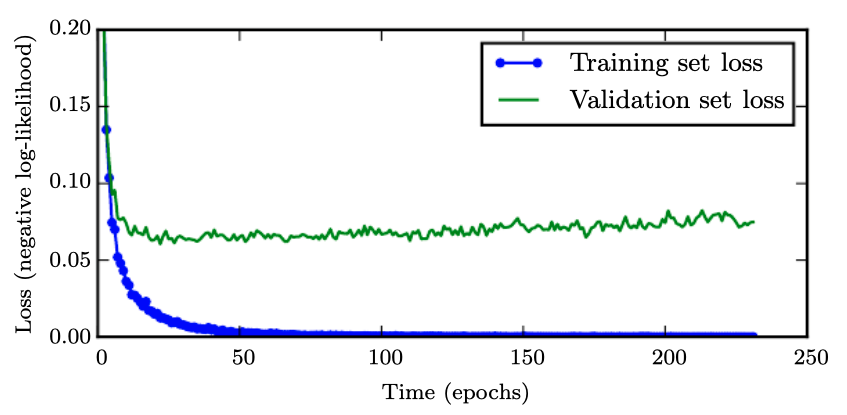


Resource: [Deep Learning: Chapter 7](https://www.deeplearningbook.org/contents/regularization.html)



---

> **Reference**   
> 1. [Disentangling Boosted Higgs Boson Production Modes with Machine Learning](https://arxiv.org/abs/2009.05930)  
> 2. [Boosting H→bb¯ with Machine Learning](https://arxiv.org/abs/1807.10768)
> 3. [Jet Algorithm](https://arxiv.org/pdf/1302.0260.pdf)
> 4. [TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)
> 5. [Tutorial: first neural network python keras](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)
> 6. [Keras.io](https://keras.io)
> 7. [Generator Method Example](https://www.kaggle.com/born2bdev/keras-cnn-with-custom-data-generator/comments)
> 8. [A detailed example of how to use data generators with Keras](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)
> 9. [Learning curve](https://en.wikipedia.org/wiki/Learning_curve_(machine_learning)



## Workflow:
 
   **i**. Loading the Training Data  
   **ii**. Visualizing jet images  
   **iii**. Building a DNN model which contains (Flatten() -> Dense(256) -> Dense(128) -> Dense(64) -> Dense(1))  
           * Here, we use **Flatten()** to reshape our image from (40,40) to (1600,)    
   **iv**. Training the DNN model (model.fit(X,Y))   
   **v**. Saving the trained model (model.save("./model.h5"))   
   **vi**. Making the learning curve figure.  
   **vii**. Loading model (load_model("./model.h5"))  
   **viii**. Applying model on Test Data and evaluating performance based on ROC and AUC   
   **ix**. Changing hyperparameters (e.g. activation function, loss function, layers, number of neuron, epoch, optimizer and regularizer) and repeat **iii** to **viii** to see which configuration is the best. 

---

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import matplotlib.image as img
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
from tqdm import tqdm
%config InlineBackend. figure_format = 'retina'



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname in os.listdir('/kaggle/input/phys591000-2022-week06/'):
    print(dirname,"/")
    for filename in os.listdir('/kaggle/input/phys591000-2022-week06/'+ dirname):
        print(filename)
    print("\n")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Test_1_channel /
Jet_Images_1
test_dict.csv


Train_1_channel /
Jet_Images_1
Jet_Images_6
Jet_Images_7
Jet_Images_5
Jet_Images_4
train_dict.csv
Jet_Images_2
Jet_Images_3


Validation_1_channel /
Jet_Images_1
val_dict.csv




---

### 1.1 Load Data and Preprocessing

* We will load data and label in the  `Train_1_channel`, `Validation_1_channel` and `Test_1_channel` folders.
* Please load top 10,000 data in `Train_1_channel` folder.
* Please load top 1,000 data in `Validation_1_channel` folder.
* Please load top 1,000 data in `Test_1_channel` folder.
* Please check the data shape.
* Please show how many W/Z jets/ quark jets in these three datasets.



In [2]:
##############################################################################
# Code for 1.1
##############################################################################
# Please code in this cell


"""
Declare a common path
"""
path  = "/kaggle/input/phys591000-2022-week06/"


def load_dic(file_path: str)-> pd.DataFrame:

        dict_file = pd.read_csv(file_path)
        print("\n")
        print("Top 10 event infomation")
        print(dict_file.head(10))

        return dict_file

"""
Load a dictionary: "train_dict.csv" in the "Train_1_channel" folder.
"""
train_dict = load_dic(path+"Train_1_channel/train_dict.csv")

"""
Load a dictionary: "val_dict.csv" in the "Validation_1_channel" folder.
"""
val_dict = load_dic(path+"Validation_1_channel/val_dict.csv")

"""
Load a dictionary: "test_dict.csv" in the "Test_1_channel" folder.
"""
test_dict = load_dic(path+"Test_1_channel/test_dict.csv")



def load_data(dict_file: pd.DataFrame, N: int, data_folder_name: str)-> np.array:
        """
        collect N jet images and labels based on a dictionary: "dict_file" in a folder: "data_folder_name" into two numpy arrays: X, Y
        """
        jet_img = []
        for i in tqdm(range(N)):
                x_jet_path = path + "/" +str(data_folder_name)+ "/" + dict_file["Jet_Images"][i]
                x_jet_tmp = np.load(x_jet_path)["jet_images"]
                jet_img.append(x_jet_tmp)

        X = np.array(jet_img) 
        Y = dict_file["Y"][:N]
        
        time.sleep(1)

        return X, Y

"""
Load top 10,000 events in the "Train_1_channel" folder.
"x_train_jet" is our images and "target_train" is our labels.
"""
x_train_jet, target_train = load_data(train_dict, 10000,"Train_1_channel")

"""
Load top 1,000 events in the "Validation_1_channel" folder.
"x_train_jet" is our images and "target_val" is our labels.
"""

x_val_jet, target_val = load_data(val_dict, 1000,"Validation_1_channel")


"""
Load top 1,000 events in the "Test_1_channel" folder.
"x_test_jet" is our images and "target_test" is our labels.
"""

x_test_jet, target_test = load_data(test_dict, 1000,"Test_1_channel")


print("The data shape of x_train_jet is{}".format(x_train_jet.shape))
print("The data shape of target_train is{}".format(target_train.shape))
print("The data shape of x_val_jet is{}".format(x_val_jet.shape))
print("The data shape of target_val is{}".format(target_val.shape))
print("The data shape of x_test_jet is{}".format(x_test_jet.shape))
print("The data shape of target_test is{}".format(target_test.shape))

"""
Check statistic balance for data
"""
print("\n")
print("There are {} W/Z jets in the training data set.".format(len(np.where(target_train==0)[0])))
print("There are {} quark jets in the training data set.".format(len(np.where(target_train==1)[0])))

print("\n")
print("There are {} W/Z jets in the validation data set.".format(len(np.where(target_val==0)[0])))
print("There are {} quark jets in the validation data set.".format(len(np.where(target_val==1)[0])))

print("\n")
print("There are {} W/Z jetsin the test data set.".format(len(np.where(target_test==0)[0])))
print("There are {} quark jets in the test data set.".format(len(np.where(target_test==1)[0])))

##############################################################################



Top 10 event infomation
                        Jet_Images  Y
0   Jet_Images_1/x_train_jet_1.npz  1
1   Jet_Images_1/x_train_jet_2.npz  0
2   Jet_Images_1/x_train_jet_3.npz  1
3   Jet_Images_1/x_train_jet_4.npz  1
4   Jet_Images_1/x_train_jet_5.npz  0
5   Jet_Images_1/x_train_jet_6.npz  1
6   Jet_Images_1/x_train_jet_7.npz  1
7   Jet_Images_1/x_train_jet_8.npz  1
8   Jet_Images_1/x_train_jet_9.npz  1
9  Jet_Images_1/x_train_jet_10.npz  1


Top 10 event infomation
                      Jet_Images  Y
0   Jet_Images_1/x_val_jet_1.npz  0
1   Jet_Images_1/x_val_jet_2.npz  1
2   Jet_Images_1/x_val_jet_3.npz  1
3   Jet_Images_1/x_val_jet_4.npz  0
4   Jet_Images_1/x_val_jet_5.npz  0
5   Jet_Images_1/x_val_jet_6.npz  0
6   Jet_Images_1/x_val_jet_7.npz  1
7   Jet_Images_1/x_val_jet_8.npz  1
8   Jet_Images_1/x_val_jet_9.npz  1
9  Jet_Images_1/x_val_jet_10.npz  1


Top 10 event infomation
                       Jet_Images  Y
0   Jet_Images_1/x_test_jet_1.npz  0
1   Jet_Images_1/x_test_jet_2.npz 

100%|██████████| 1000/1000 [00:06<00:00, 144.78it/s]


The data shape of x_train_jet is(10000, 1, 40, 40)
The data shape of target_train is(10000,)
The data shape of x_val_jet is(1000, 1, 40, 40)
The data shape of target_val is(1000,)
The data shape of x_test_jet is(1000, 1, 40, 40)
The data shape of target_test is(1000,)


There are 4918 W/Z jets in the training data set.
There are 5082 quark jets in the training data set.


There are 503 W/Z jets in the validation data set.
There are 497 quark jets in the validation data set.


There are 512 W/Z jetsin the test data set.
There are 488 quark jets in the test data set.


---

### 1.2  
* Please draw two jet images for a W/Z jet and a quark jet, respectively.
    * You can just take images in the training dataset.
    * One figure is one jet image, so we will have two figure. 
     
[Ref: matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)  

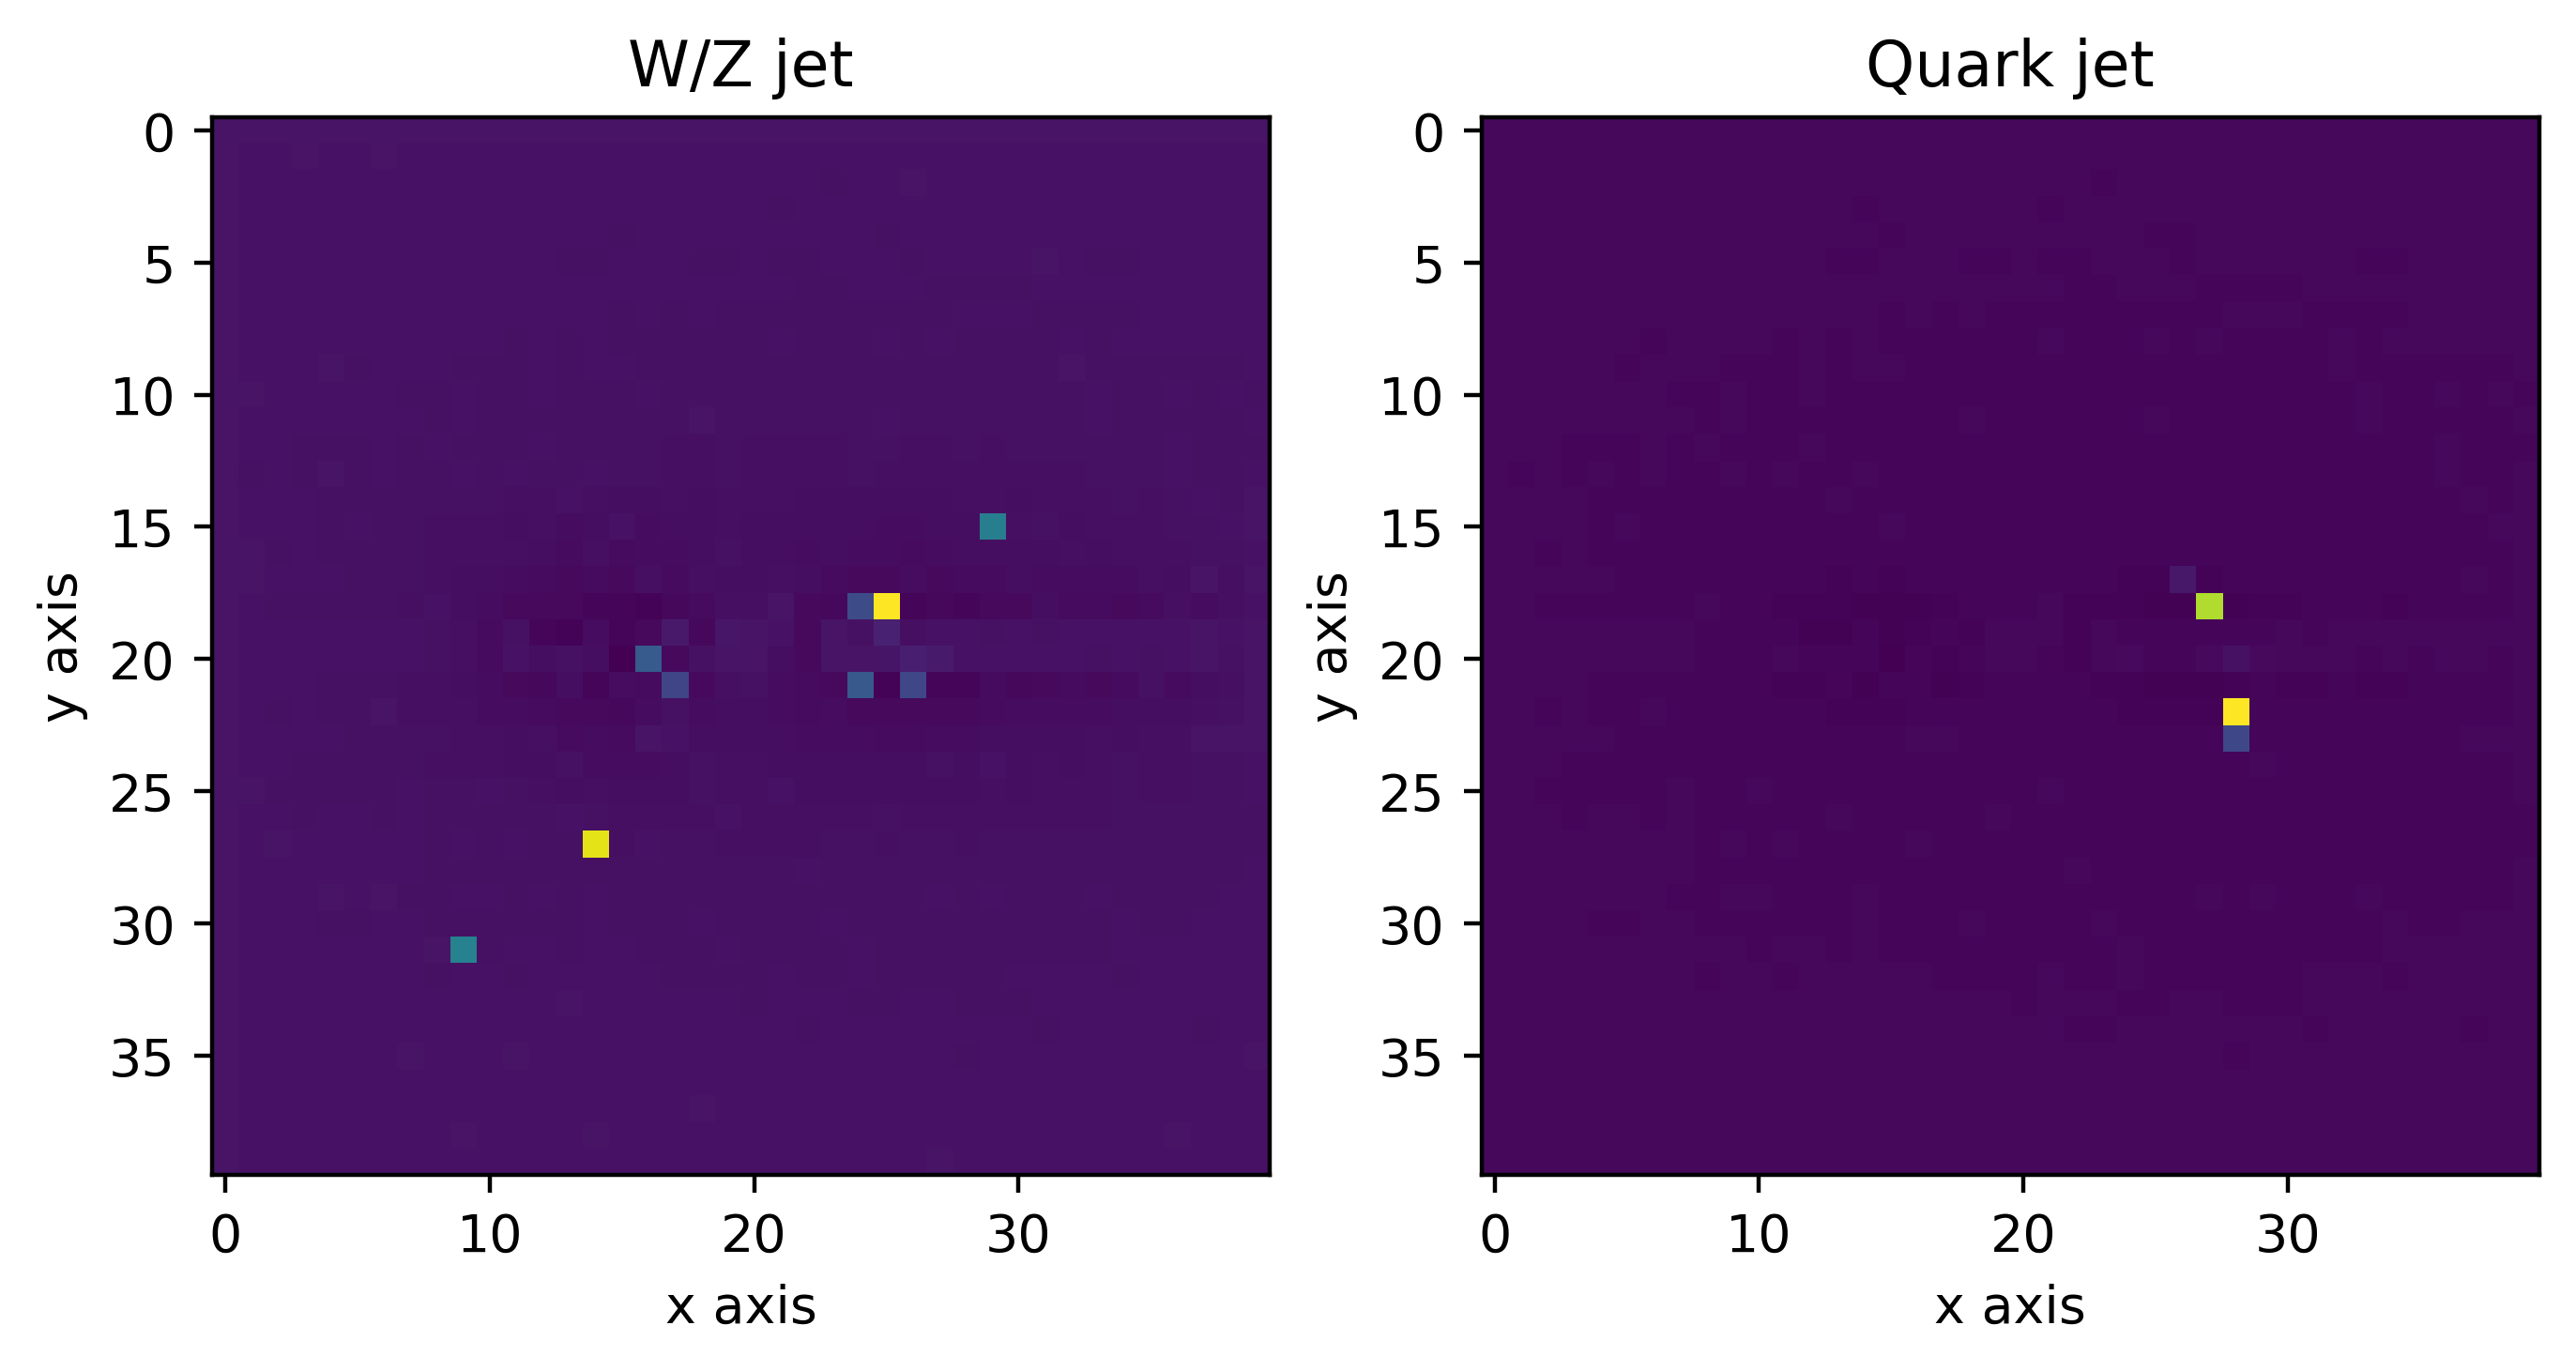

In [3]:
##############################################################################
# Code for 1.2
# 
##############################################################################
# Please code in this cell


fig = plt.figure(figsize=(8,4), dpi=200)

plt.subplot(1,2,1)
plt.imshow(x_train_jet[1,0])
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("W/Z jet")

plt.subplot(1,2,2)
plt.imshow(x_train_jet[0,0])
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Quark jet")

plt.show()
##############################################################################

---

### 1.3
* Please average W/Z jets and quark jets, respectively.
    * You can just take images in the training dataset.
    * the averaged jet image -> take average for N jet images.  

* Please draw averaged W/Z jet image and averaged quark jet image.
    
[Ref: numpy.average](https://numpy.org/doc/stable/reference/generated/numpy.average.html)  
[Ref: matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)  

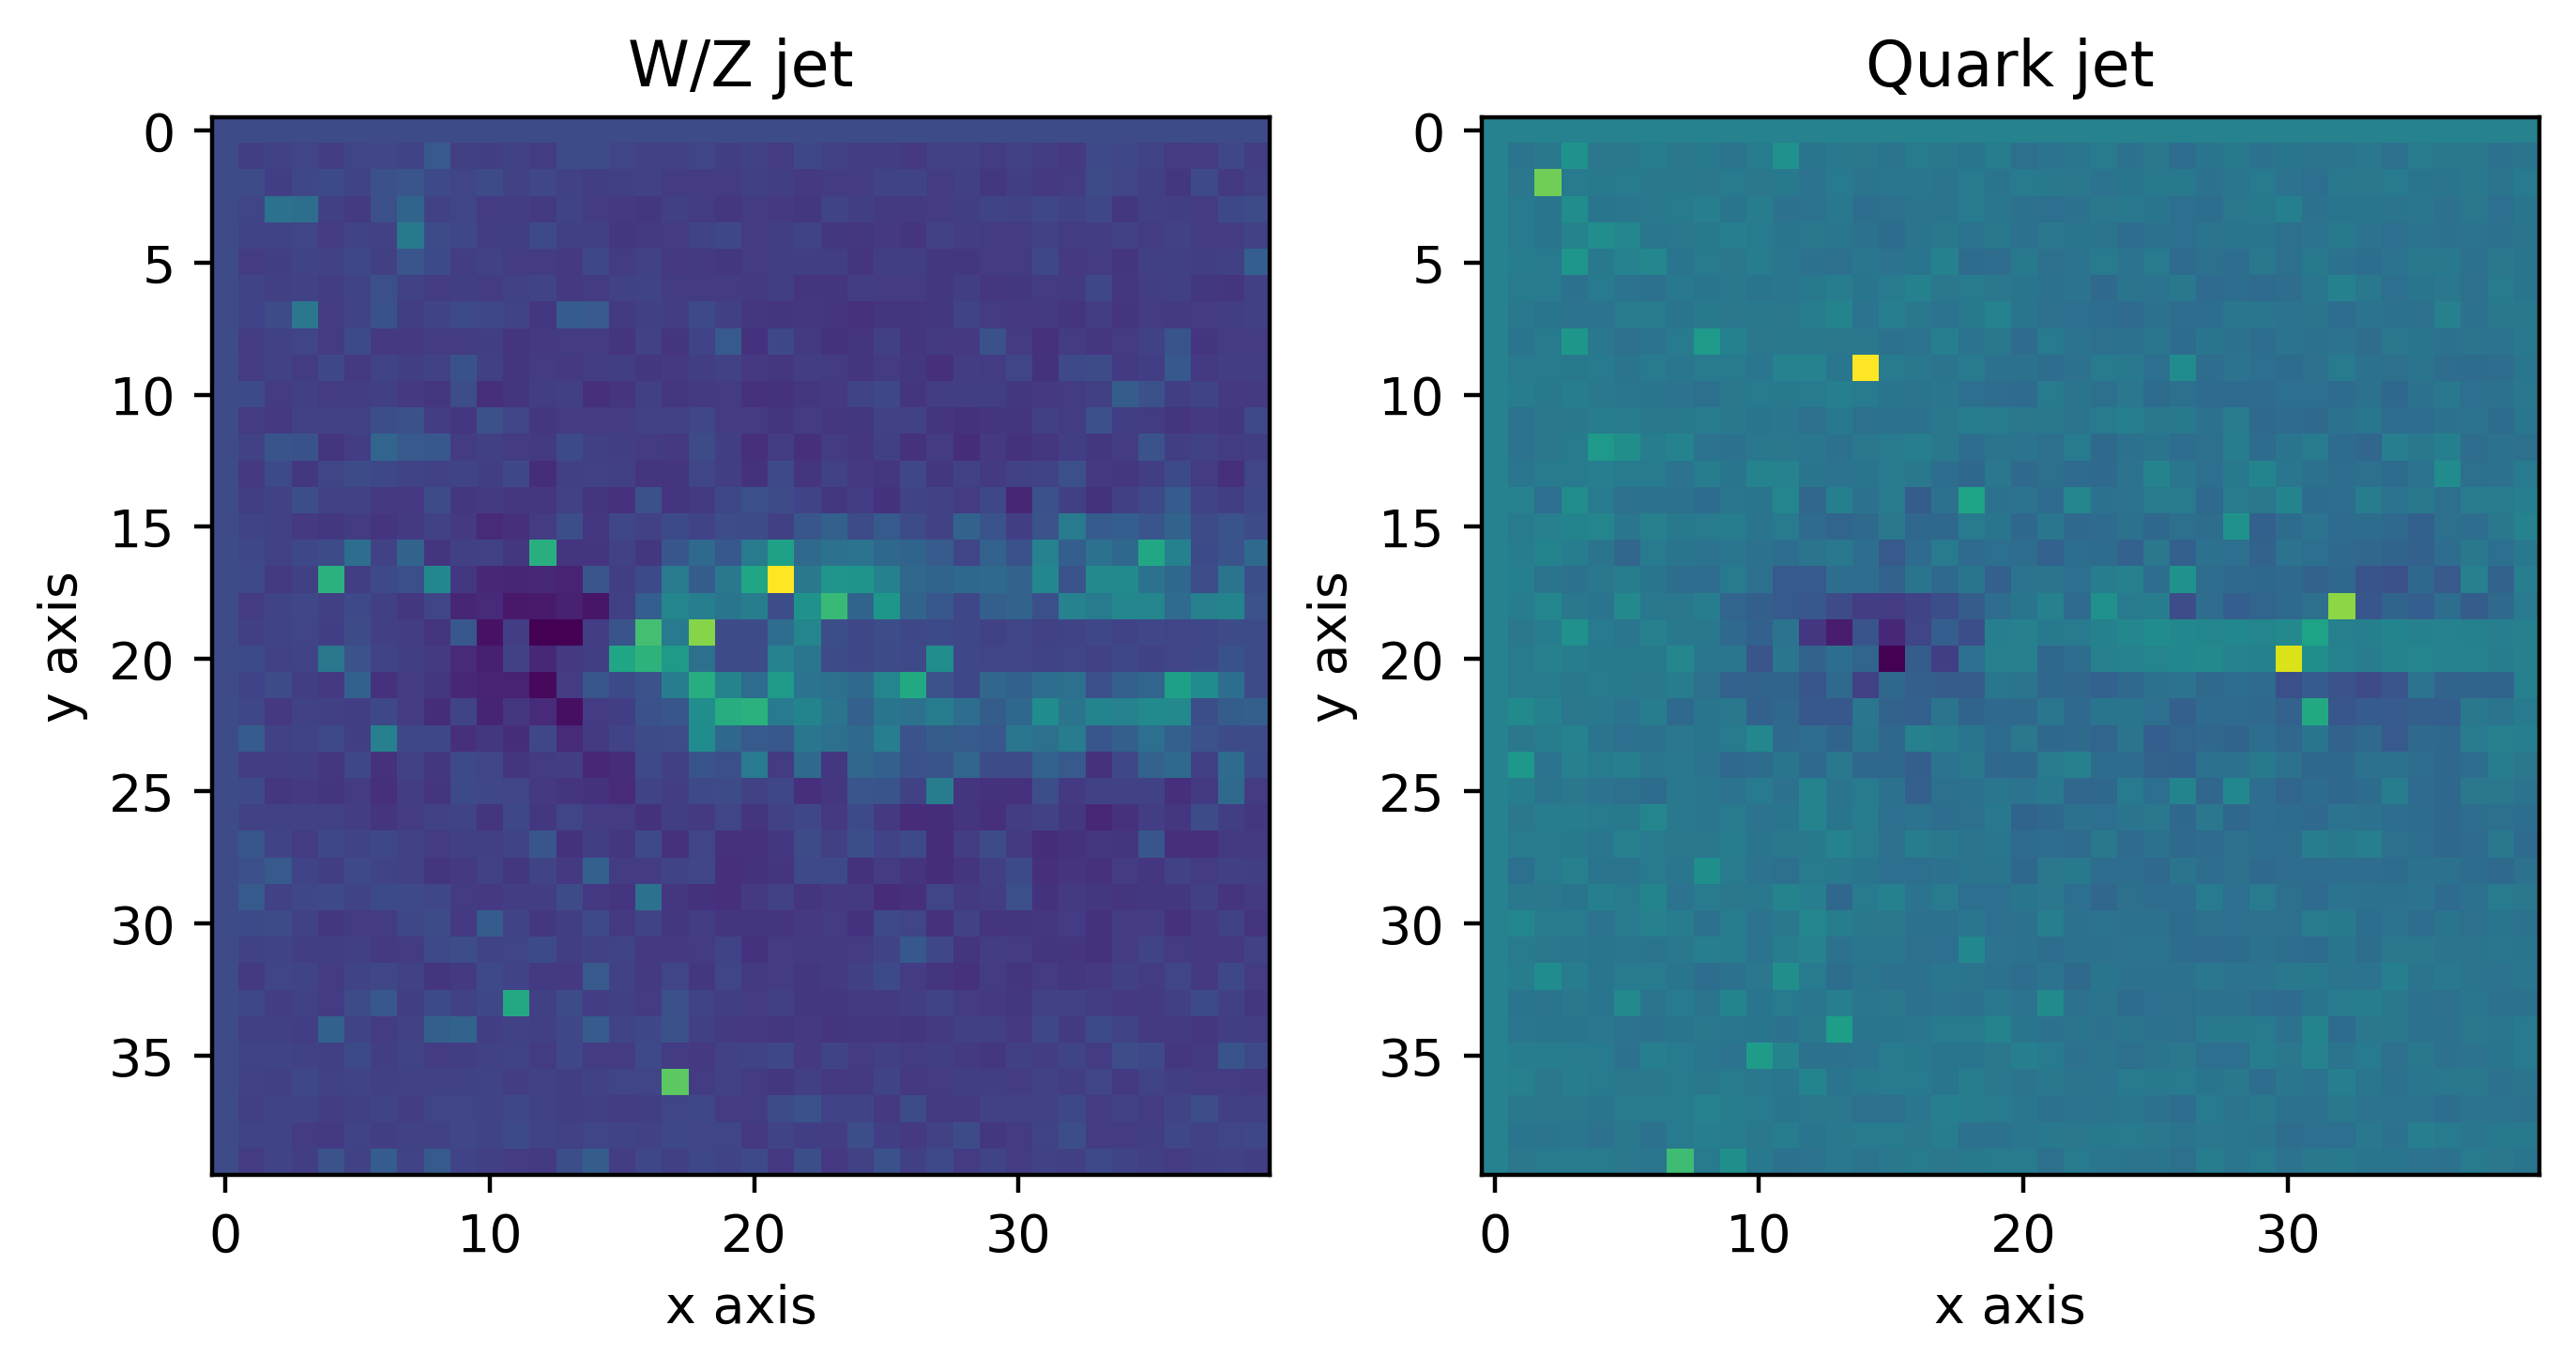

In [4]:
##############################################################################
# Code for 1.3
# 
##############################################################################
# Please code in this cell

# split them
wz = x_train_jet[target_train==0]
qu = x_train_jet[target_train==1]

# getting average
wz_mean_train = np.mean(wz, axis= 0)[0]
qu_mean_train = np.mean(qu, axis= 0)[0]

# draw
fig = plt.figure(figsize=(8,4), dpi=200)

plt.subplot(1,2,1)
plt.imshow(wz_mean_train)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("W/Z jet")

plt.subplot(1,2,2)
plt.imshow(qu_mean_train)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Quark jet")

plt.show()
##############################################################################


---

### 1.4
Discussion for 1.4   
* Please compare results in 1.2 and 1.3 and then describe what you found.
---
Please write your discussion in this cell:     



We found that W/Z data is more gathered than the quark data in the 1.3 average image figure.<br>
We consider that using average image can demonstrate the jet appearing probability distribution compared to single image like 1.2.

We think that the quark jet will appear more randomly that W/X jet,<br>
which causes the average image become flattly in the full figure.<br>

---

###  1.5 

***NOTE: You should import any package you need in this cell***   
***e.g.***    
```
import tensorflow as tf
import tensorflow.keras as keras
........
```
---
Bulid a DNN Architecture and Training

* Please create a DNN architecture with 3 hidden layers and 1 output layer.
    * There are 256 neurons in the first hidden layer, 128 neurons in the second hidden layer and 64 neurons in the third hidden layer
    * In the output layer, there is 1 neurons.
    * input_shape = (1,40,40) -> (Flatten() -> Dense(256) -> Dense(128) -> Dense(64) -> Dense(1))  
    * Here, we use **Flatten()** to reshape our image from (40,40) to (1600,) 

* **RELU** will be activation function for each hidden layer, and **sigmoid** will be the activation function for output layer.
* `Adadelta` will be the optimizer and `binary_crossentropy` will be the loss function.
* Please visualize or print your Architecture.
* Please train your DNN model with `batch_size=512` and `epochs=50`.
    * x = x_train_jet, 
    * y = target_train,
    * validation_data= (x_val_jet, target_val)
* Please save your model and name it to be `model_DNN.h5`.

[Ref: Keras.io](https://keras.io)   
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref: Tutorial: first neural network python keras](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)    
[Ref: TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/)      
[Ref: How to Visualize a Deep Learning Neural Network Model in Keras](https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/)   
[Ref: Keras Model Training API](https://keras.io/api/models/model_training_apis/)     
[Ref: Keras Model Training API: fit method](https://keras.io/api/models/model_training_apis/#fit-method)   
[Ref: Save and load Keras models](https://keras.io/api/models/model_saving_apis/)    
[Ref: Sigmoid function in Wiki](https://en.wikipedia.org/wiki/Sigmoid_function)   
[Ref: Adadelta Keras api ](https://keras.io/api/optimizers/adadelta/)   
[Ref: Binary Crossentropy Keras api ](https://keras.io/api/losses/probabilistic_losses/)   
[Ref: Cross Entropy in Wiki](https://en.wikipedia.org/wiki/Cross_entropy)    


2022-03-24 10:19:24.128528: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
None


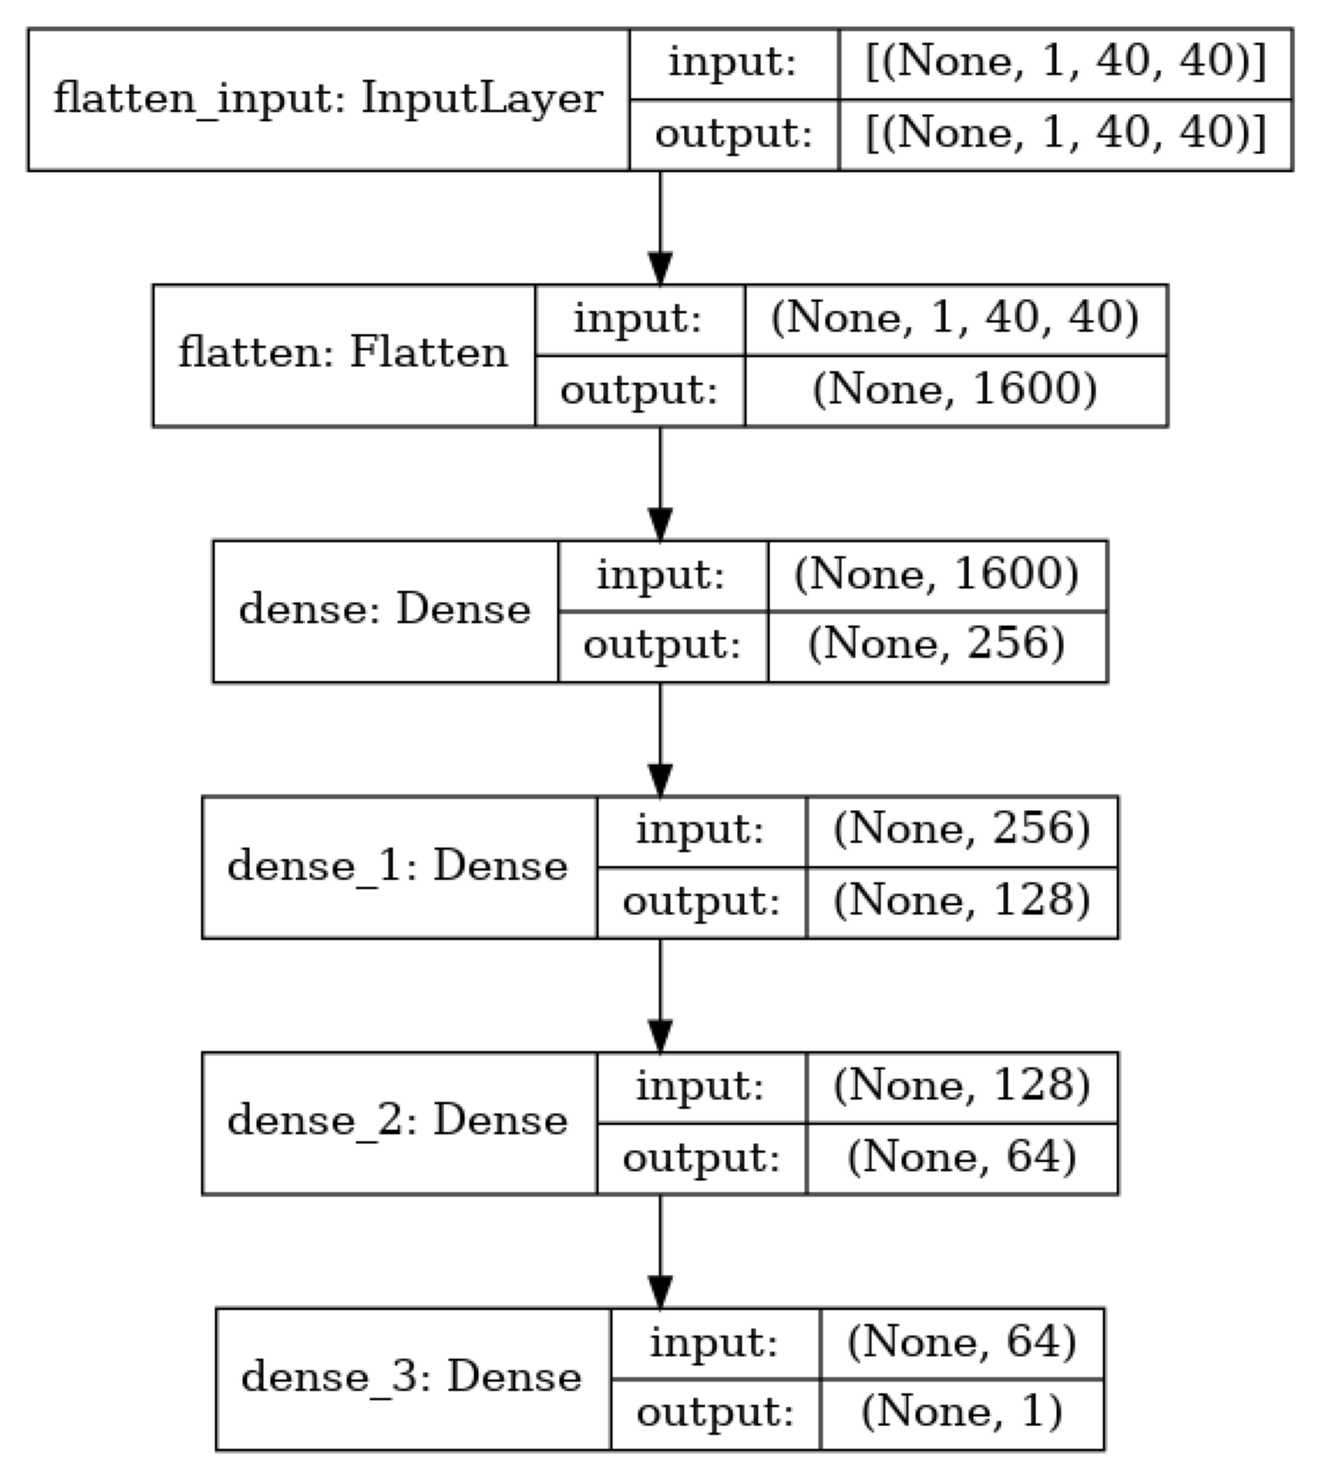

2022-03-24 10:19:26.307959: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
20/20 [==============================] - 1s 28ms/step - loss: 0.6717 - accuracy: 0.6099 - val_loss: 0.6467 - val_accuracy: 0.6310
Epoch 2/50
20/20 [==============================] - 0s 17ms/step - loss: 0.5844 - accuracy: 0.7018 - val_loss: 0.6256 - val_accuracy: 0.6780
Epoch 3/50
20/20 [==============================] - 0s 18ms/step - loss: 0.5215 - accuracy: 0.7538 - val_loss: 0.6163 - val_accuracy: 0.6980
Epoch 4/50
20/20 [==============================] - 0s 18ms/step - loss: 0.4659 - accuracy: 0.7875 - val_loss: 0.6314 - val_accuracy: 0.7100
Epoch 5/50
20/20 [==============================] - 0s 18ms/step - loss: 0.4447 - accuracy: 0.8013 - val_loss: 0.6472 - val_accuracy: 0.7150
Epoch 6/50
20/20 [==============================] - 0s 19ms/step - loss: 0.4061 - accuracy: 0.8242 - val_loss: 0.6806 - val_accuracy: 0.7180
Epoch 7/50
20/20 [==============================] - 0s 17ms/step - loss: 0.3720 - accuracy: 0.8456 - val_loss: 0.9005 - val_accuracy: 0.6790
Epoch 8/50
20

In [5]:
%%time
##############################################################################
# Code for 1.5
# 
##############################################################################
# Please code in this cell

"""
Import tensorflow packages
"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.optimizers import Adadelta
from keras.utils.vis_utils import plot_model

"""
Define a DNN model
"""
model = Sequential()
model.add(Flatten(input_shape=(1,40,40)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adadelta(learning_rate=1.0),
              metrics=['accuracy'])


"""
Print Architecture
"""
print(model.summary())
fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('model_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()

"""
Model Training
"""
rec = model.fit(x_train_jet, target_train, epochs=50, batch_size=512,
                validation_data=(x_val_jet, target_val))

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_train_jet, target_train)))
print('Performance (target)')
print('Loss: %.5f, Acc: %.5f' % tuple(model.evaluate(x_val_jet, target_val)))    

"""
Save Model
"""
model.save("model_DNN.h5")



##############################################################################

---

### 1.6

Learning Curve

* Please make a learning curve of the DNN from 1.5
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

[Ref: Display Deep Learning Model Training History in Keras](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

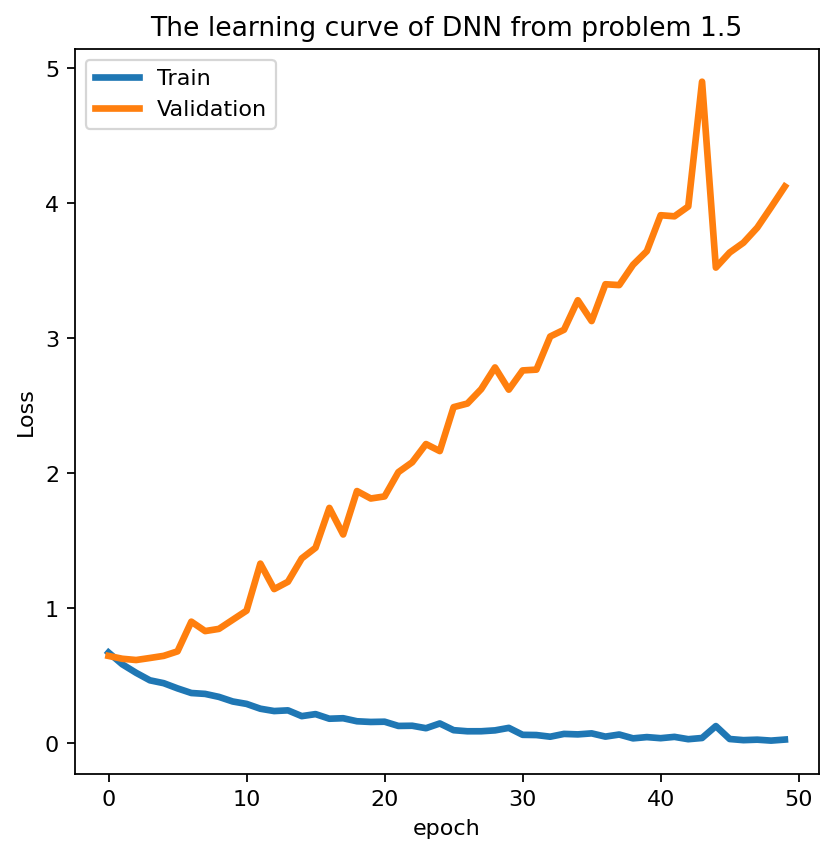

In [6]:
#############################################################################
# Code for 1.6
# 
#############################################################################
# Please code in this cell

# Plot showing the evolution of loss and accuracy, comparing the training and the test samples.
fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of DNN from problem 1.5")
plt.plot(rec.history['loss'], lw=3, label='Train')
plt.plot(rec.history['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
#############################################################################

---

### 1.７
Study Performance
* Please load your trained model `model_DNN.h5`.
* Please use test data set to study performance.
    * Please calculate AUC.
    * Please make a ROC figure.
    * Please show the confusion matrix.
    
[Ref: Keras.io](https://keras.io)
[Ref: Save and load Keras models](https://www.tensorflow.org/guide/keras/save_and_serialize)    
[Ref: TensorFlow 2: quickstart for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner)    
[Ref: Tutorial: first neural network python keras](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)    
[Ref: TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras](https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/) 

AUC of train data is: 0.9999172377402625
AUC of test data is: 0.6802158043032788


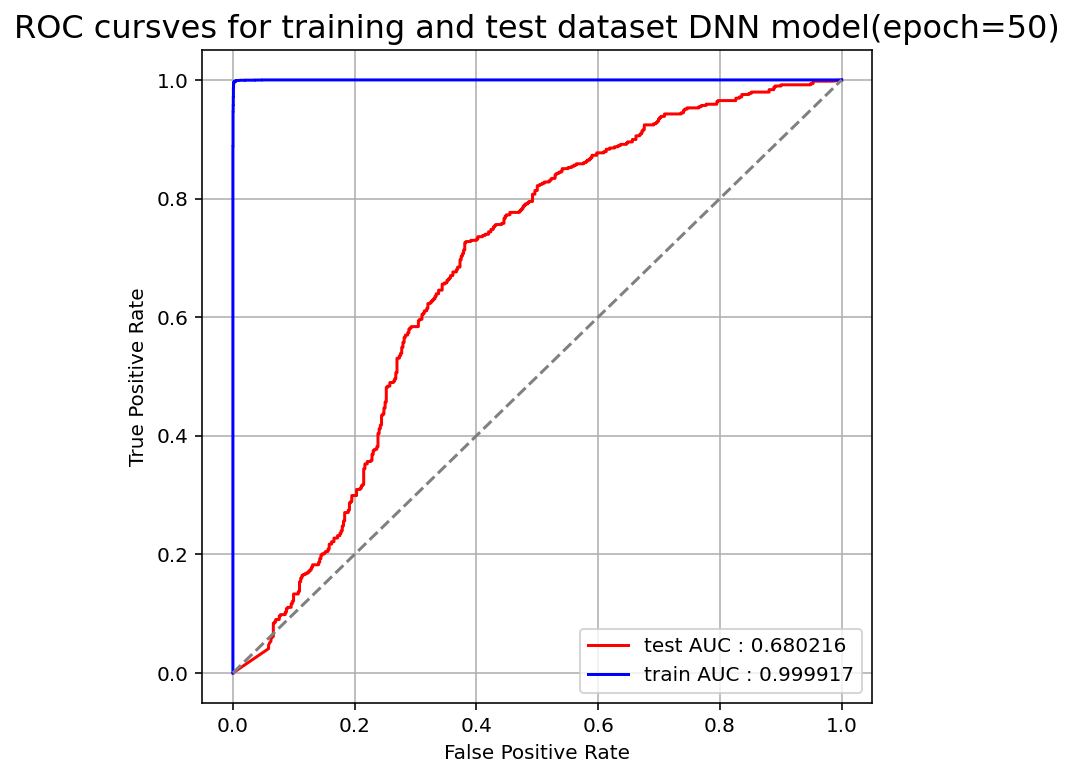

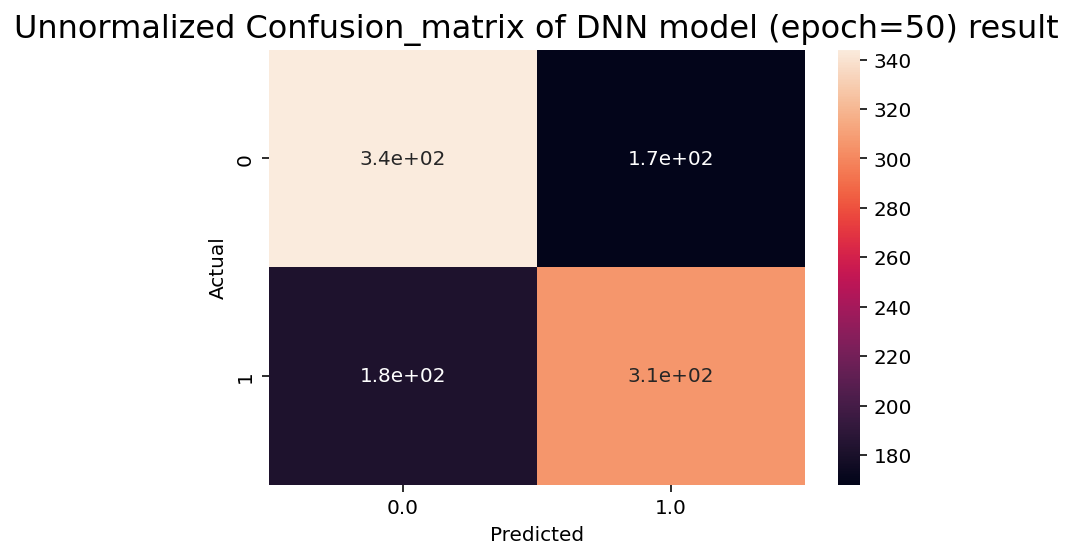

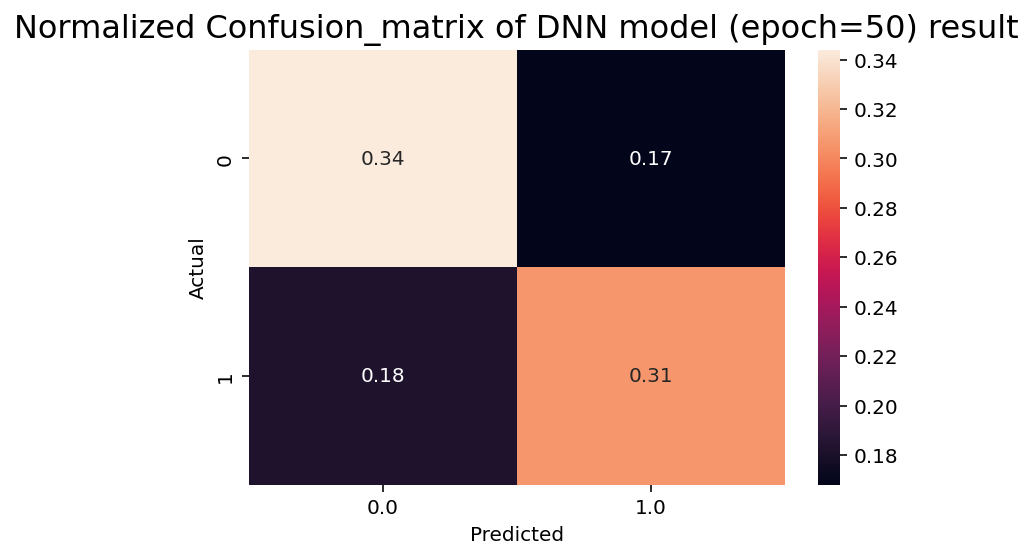

In [7]:
#############################################################################
#Code for 1.7
# 
##############################################################################
# Please code in this cell

# loading model
from tensorflow.keras.models import load_model
model = load_model('model_DNN.h5')
target_train_np = target_train.to_numpy()
target_test_np  = target_test.to_numpy()

# roc/auc calculation
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc

p_train = model.predict(x_train_jet)[:,0]

fpr_train, tpr_train, thr_train = roc_curve(target_train_np, p_train, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)
print('AUC of train data is:',roc_auc_train)

p_test = model.predict(x_test_jet)[:,0]
fpr_test, tpr_test, thr_test = roc_curve(target_test_np, p_test, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)
print('AUC of test data is:',roc_auc_test)

# plot roc curve
plt.figure(figsize=(6,6))
plt.title('ROC cursves for training and test dataset DNN model(epoch=50)', fontsize=16)
plt.plot(fpr_test,tpr_test, color='r',label = 'test AUC : %f' %roc_auc_test)
plt.plot(fpr_train,tpr_train, color='b',label = 'train AUC : %f' %roc_auc_train)
# Add a diagonal line representing the ROC from random choice
plt.plot([0, 1], [0, 1],linestyle='--', c='grey')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()


# deal with confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

p_train[p_train>0.5]=1
p_train[p_train<0.5]=0

p_test[p_test>0.5]=1
p_test[p_test<0.5]=0

# save a dataframe of test and predict
data = {'target_test': target_test_np, 'p_test': p_test }
df = pd.DataFrame(data, columns=['target_test','p_test'])

# create a confusion matrix
confusion_matrix0 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix1 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'], normalize=True)

sn.heatmap(confusion_matrix0, annot=True)
plt.title("Unnormalized Confusion_matrix of DNN model (epoch=50) result", fontsize=16)
plt.show()

sn.heatmap(confusion_matrix1, annot=True)
plt.title("Normalized Confusion_matrix of DNN model (epoch=50) result", fontsize=16)
plt.show()

##############################################################################


---

###  1.8


Now, let's try a larger epochs.
* Please repeat cell **1.5**, but let `epochs=500`
* Please save your model and name it to be `model_DNN_epoch_500.h5`.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
None


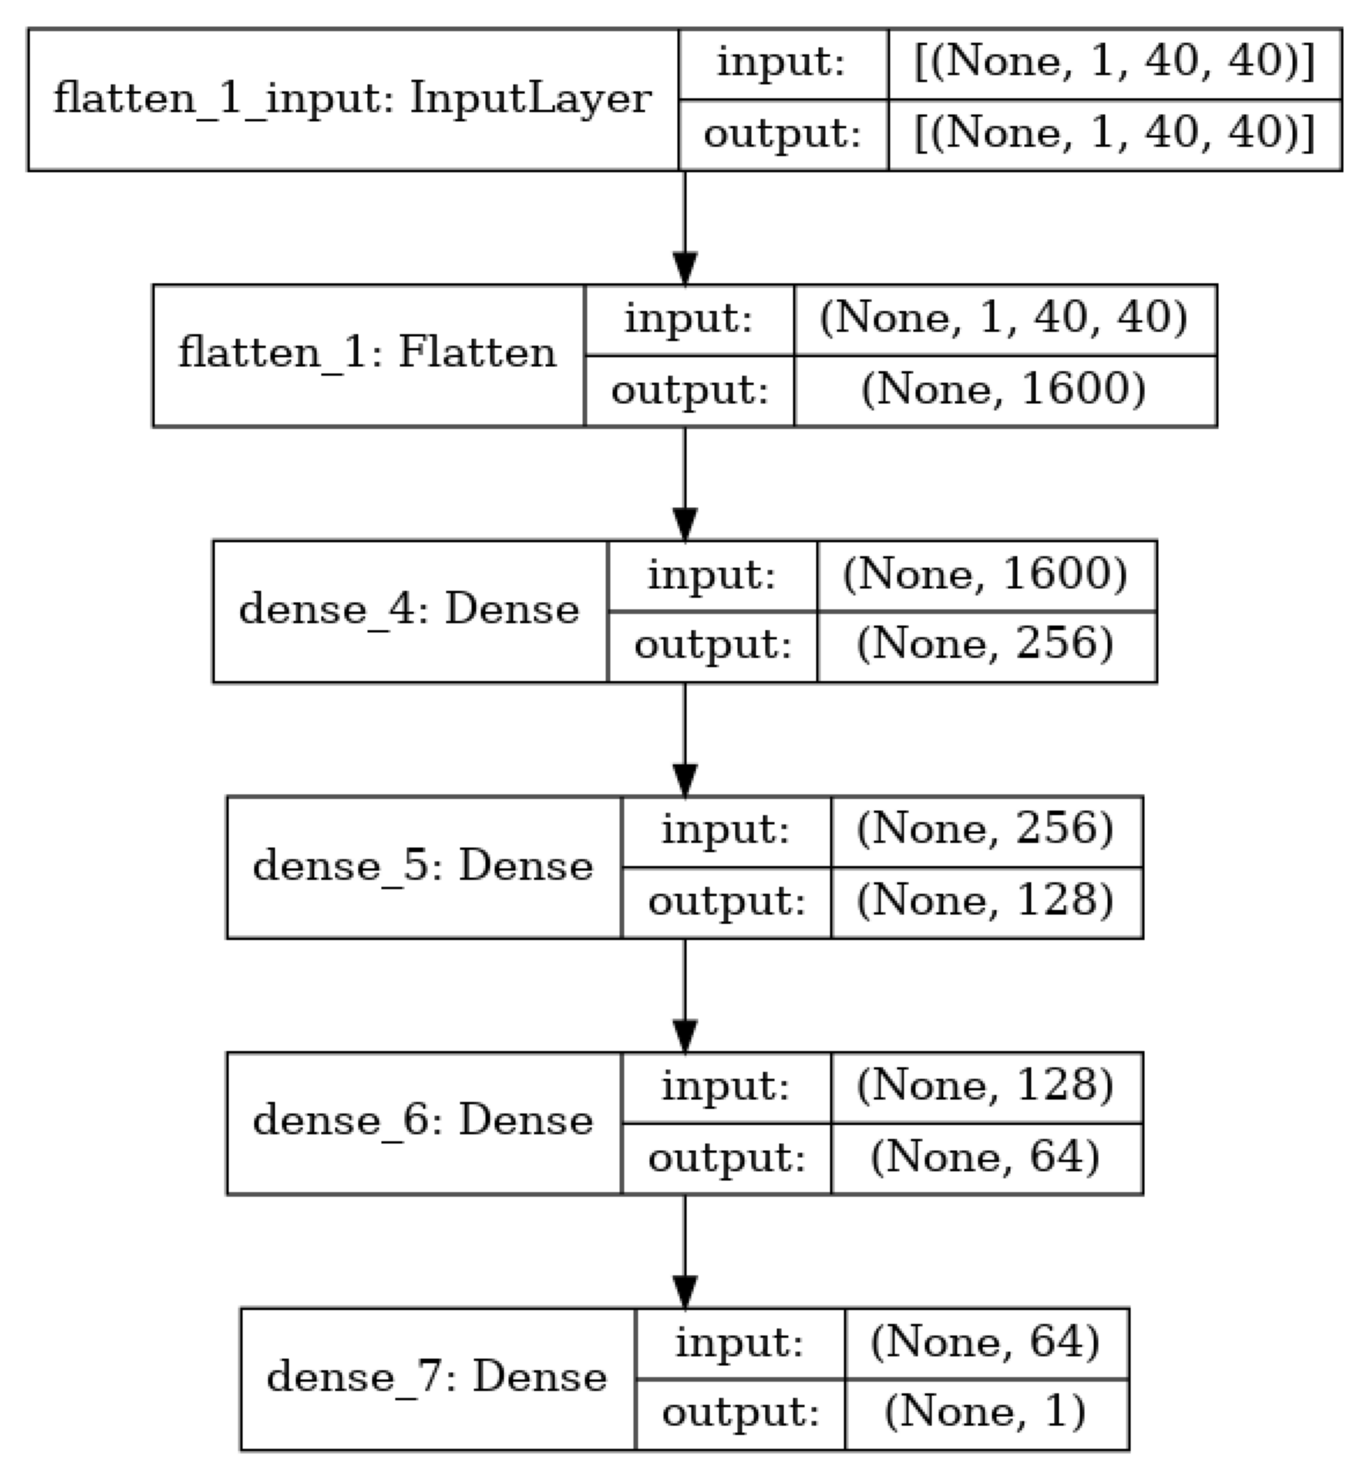

Epoch 1/500
20/20 [==============================] - 1s 27ms/step - loss: 0.6682 - accuracy: 0.6095 - val_loss: 0.6375 - val_accuracy: 0.6330
Epoch 2/500
20/20 [==============================] - 0s 19ms/step - loss: 0.5916 - accuracy: 0.6914 - val_loss: 0.6146 - val_accuracy: 0.6740
Epoch 3/500
20/20 [==============================] - 0s 18ms/step - loss: 0.5271 - accuracy: 0.7460 - val_loss: 0.5993 - val_accuracy: 0.7000
Epoch 4/500
20/20 [==============================] - 0s 19ms/step - loss: 0.4805 - accuracy: 0.7787 - val_loss: 0.5975 - val_accuracy: 0.6960
Epoch 5/500
20/20 [==============================] - 0s 19ms/step - loss: 0.4434 - accuracy: 0.8035 - val_loss: 0.6229 - val_accuracy: 0.7050
Epoch 6/500
20/20 [==============================] - 0s 19ms/step - loss: 0.4160 - accuracy: 0.8174 - val_loss: 0.6986 - val_accuracy: 0.6930
Epoch 7/500
20/20 [==============================] - 0s 18ms/step - loss: 0.3849 - accuracy: 0.8376 - val_loss: 0.7026 - val_accuracy: 0.7060
Epoch 

In [8]:
%%time
##############################################################################
# Code for 1.8
# 
##############################################################################
# Please code in this cell



"""
Define a DNN model
"""
m2 = Sequential()
m2.add(Flatten(input_shape=(1,40,40)))
m2.add(Dense(256, activation='relu'))
m2.add(Dense(128, activation='relu'))
m2.add(Dense(64, activation='relu'))
m2.add(Dense(1, activation='sigmoid'))

m2.compile(loss='binary_crossentropy',
              optimizer=Adadelta(learning_rate=1.0),
              metrics=['accuracy'])

"""
Print Architecture
"""
print(model.summary())
fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(m2, to_file='m2_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('m2_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()

"""
Model Training
"""

r2 = m2.fit(x_train_jet, target_train, epochs=500, batch_size=512,
                validation_data=(x_val_jet, target_val))

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(m2.evaluate(x_train_jet, target_train)))
print('Performance (target)')
print('Loss: %.5f, Acc: %.5f' % tuple(m2.evaluate(x_val_jet, target_val)))    

"""
Save Model
"""
model.save("model_DNN_epoch_500.h5")

##############################################################################

---

### 1.9

Learning Curve and Performance of the DNN   

Learning Curve: 

* Please make a learning curve of the DNN from 1.8
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve for training and validation in the same figure.

Study Performance:  
   
* Please load your trained model `model_DNN_epoch_500.h5`.
* Please use test data set to study performance.
    * Please calculate AUC.
    * Please make a ROC figure.
    * Please show the confusion matrix.


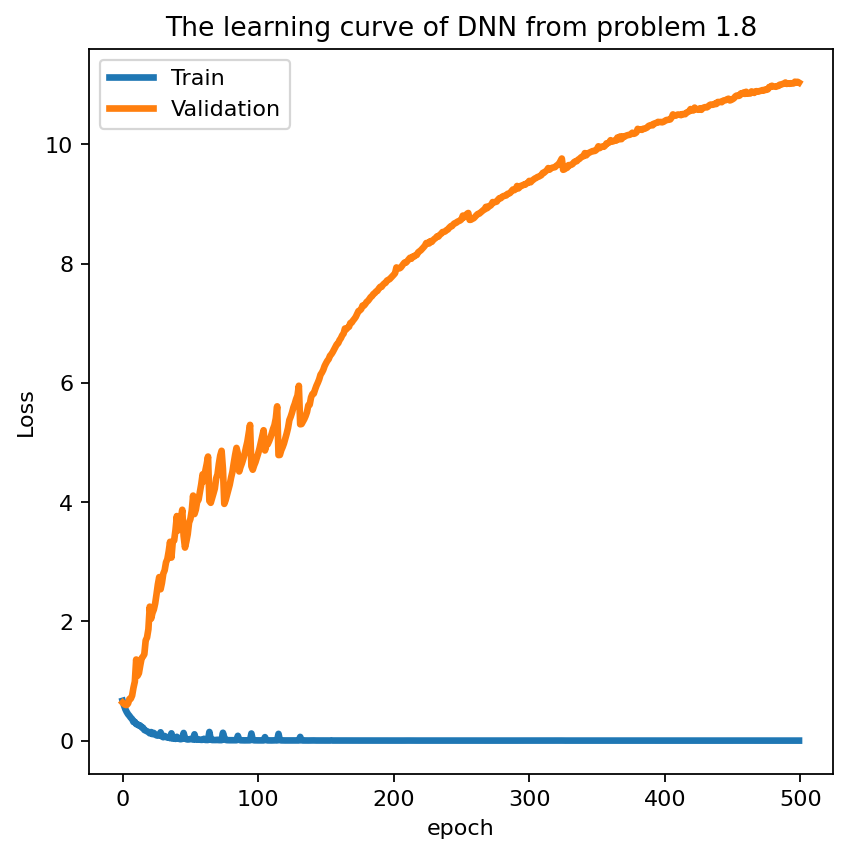

AUC of train data is: 0.9999172377402625
AUC of test data is: 0.6802158043032788


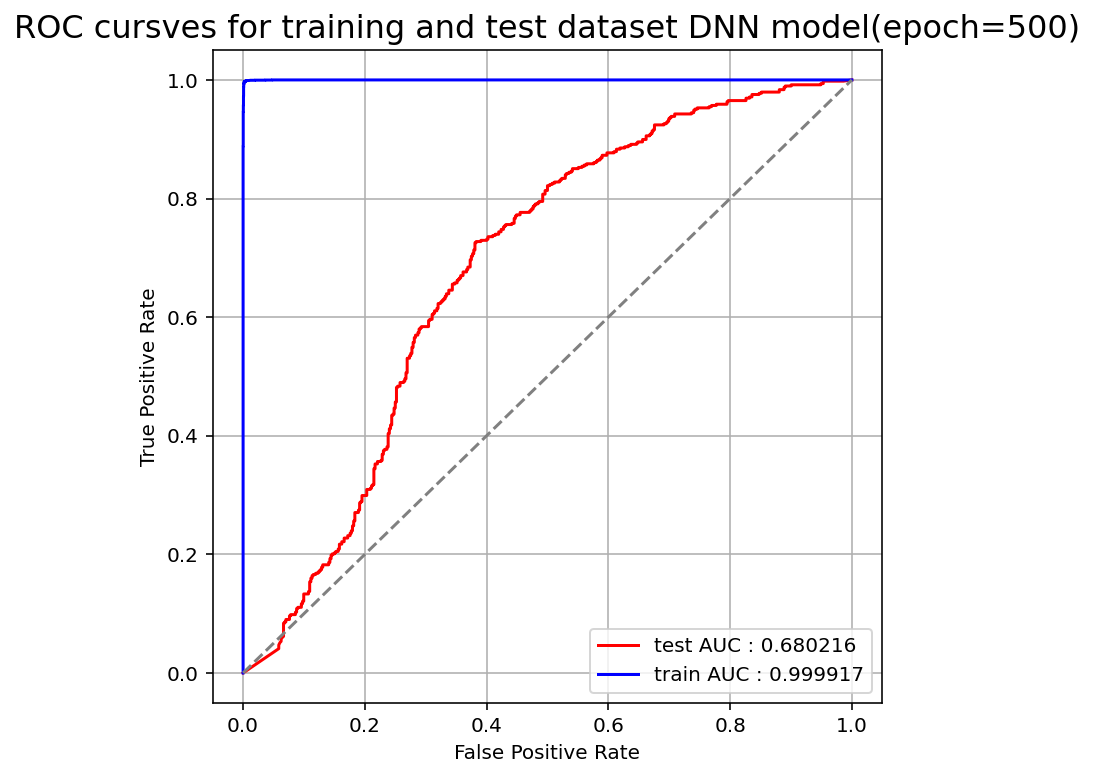

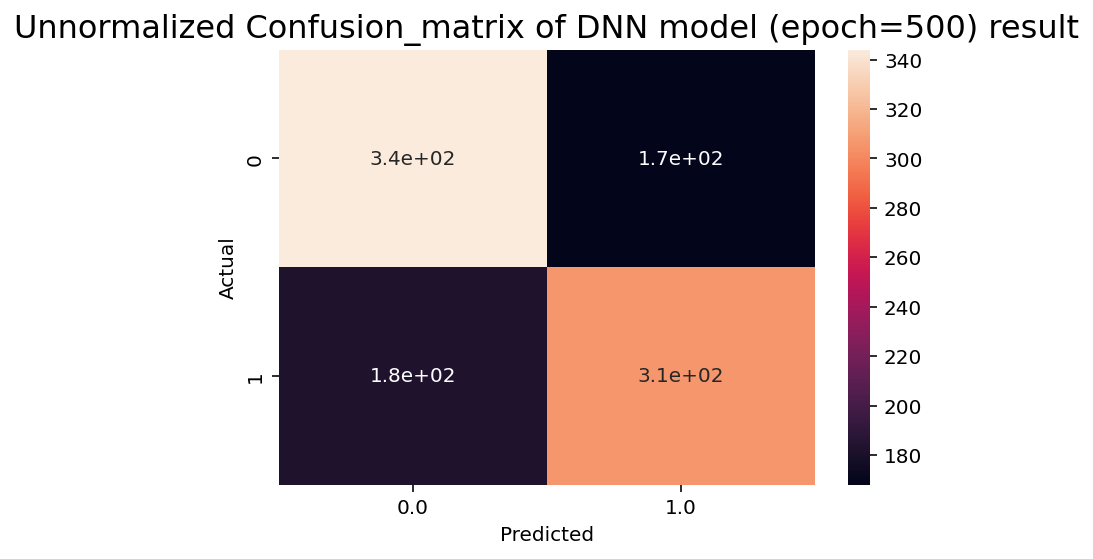

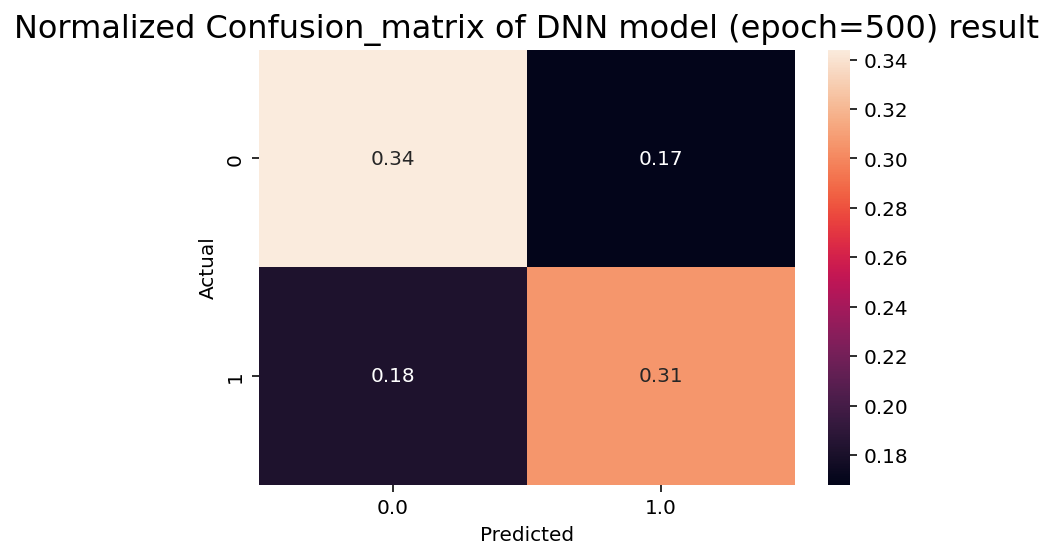

In [9]:
#############################################################################
#Code for 1.9
# 
##############################################################################
# Please code in this cell


"""
Learning Curve
"""
# Plot showing the evolution of loss and accuracy, comparing the training and the test samples.
fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of DNN from problem 1.8")
plt.plot(r2.history['loss'], lw=3, label='Train')
plt.plot(r2.history['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


"""
ROC Curve and Confusion Matrix
"""
# loading model
m2 = load_model('model_DNN_epoch_500.h5')
target_train_np = target_train.to_numpy()
target_test_np  = target_test.to_numpy()

# roc/auc calculation
p_train = m2.predict(x_train_jet)[:,0]

fpr_train, tpr_train, thr_train = roc_curve(target_train_np, p_train, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)
print('AUC of train data is:',roc_auc_train)

p_test = m2.predict(x_test_jet)[:,0]
fpr_test, tpr_test, thr_test = roc_curve(target_test_np, p_test, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)
print('AUC of test data is:',roc_auc_test)

# plot roc curve
plt.figure(figsize=(6,6))
plt.title('ROC cursves for training and test dataset DNN model(epoch=500)', fontsize=16)
plt.plot(fpr_test,tpr_test, color='r',label = 'test AUC : %f' %roc_auc_test)
plt.plot(fpr_train,tpr_train, color='b',label = 'train AUC : %f' %roc_auc_train)
# Add a diagonal line representing the ROC from random choice
plt.plot([0, 1], [0, 1],linestyle='--', c='grey')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()

# deal with confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

p_train[p_train>0.5]=1
p_train[p_train<0.5]=0

p_test[p_test>0.5]=1
p_test[p_test<0.5]=0

# save a dataframe of test and predict
data = {'target_test': target_test_np, 'p_test': p_test }
df = pd.DataFrame(data, columns=['target_test','p_test'])

# create a confusion matrix
confusion_matrix0 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix1 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'], normalize=True)

sn.heatmap(confusion_matrix0, annot=True)
plt.title("Unnormalized Confusion_matrix of DNN model (epoch=500) result", fontsize=16)
plt.show()

sn.heatmap(confusion_matrix1, annot=True)
plt.title("Normalized Confusion_matrix of DNN model (epoch=500) result", fontsize=16)
plt.show()

##############################################################################

---

### 1.10
Discussion for 1.10
* Please compare results in 1.6, 1.7 and 1.9.
---
Please write your discussion in this cell:     



We found that either epoch using 50 or 500 can not improve the model from overfitting.<br>
The ROC curves and learning curves for both cases show that the models are training well when traing stage,<br>
but getting bad results when giving test data to the trained models.

We consider that the performance of the DNN model isn't mainly dependent on the number of epochs,<br>
but the original of the model design, i.e. the differernt Activation Func./ structure(like how many layers)/ loss Func. and so on,<br>
will influence the model performance.

We also suppose that if the value of loss function of the learning curve is progressive to certain value,<br>
then there is no different between epoch is 50 or 500.

---

### 1.11 Hyperparameters Tunning by Hand

We believe that you don't satisfy results above.  
It's time to do **Hyperparameters Tunning**
* Please change any hyperparameters as possible as you can (e.g. activation function, loss function, layers, number of neuron, epoch, optimizer and regularizer) to get the best performance.
* Please show the learning curve to prove you have a well training
* Please use AUC, ROC curve and confusion matrix to show your perfomnace


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               409856    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
None


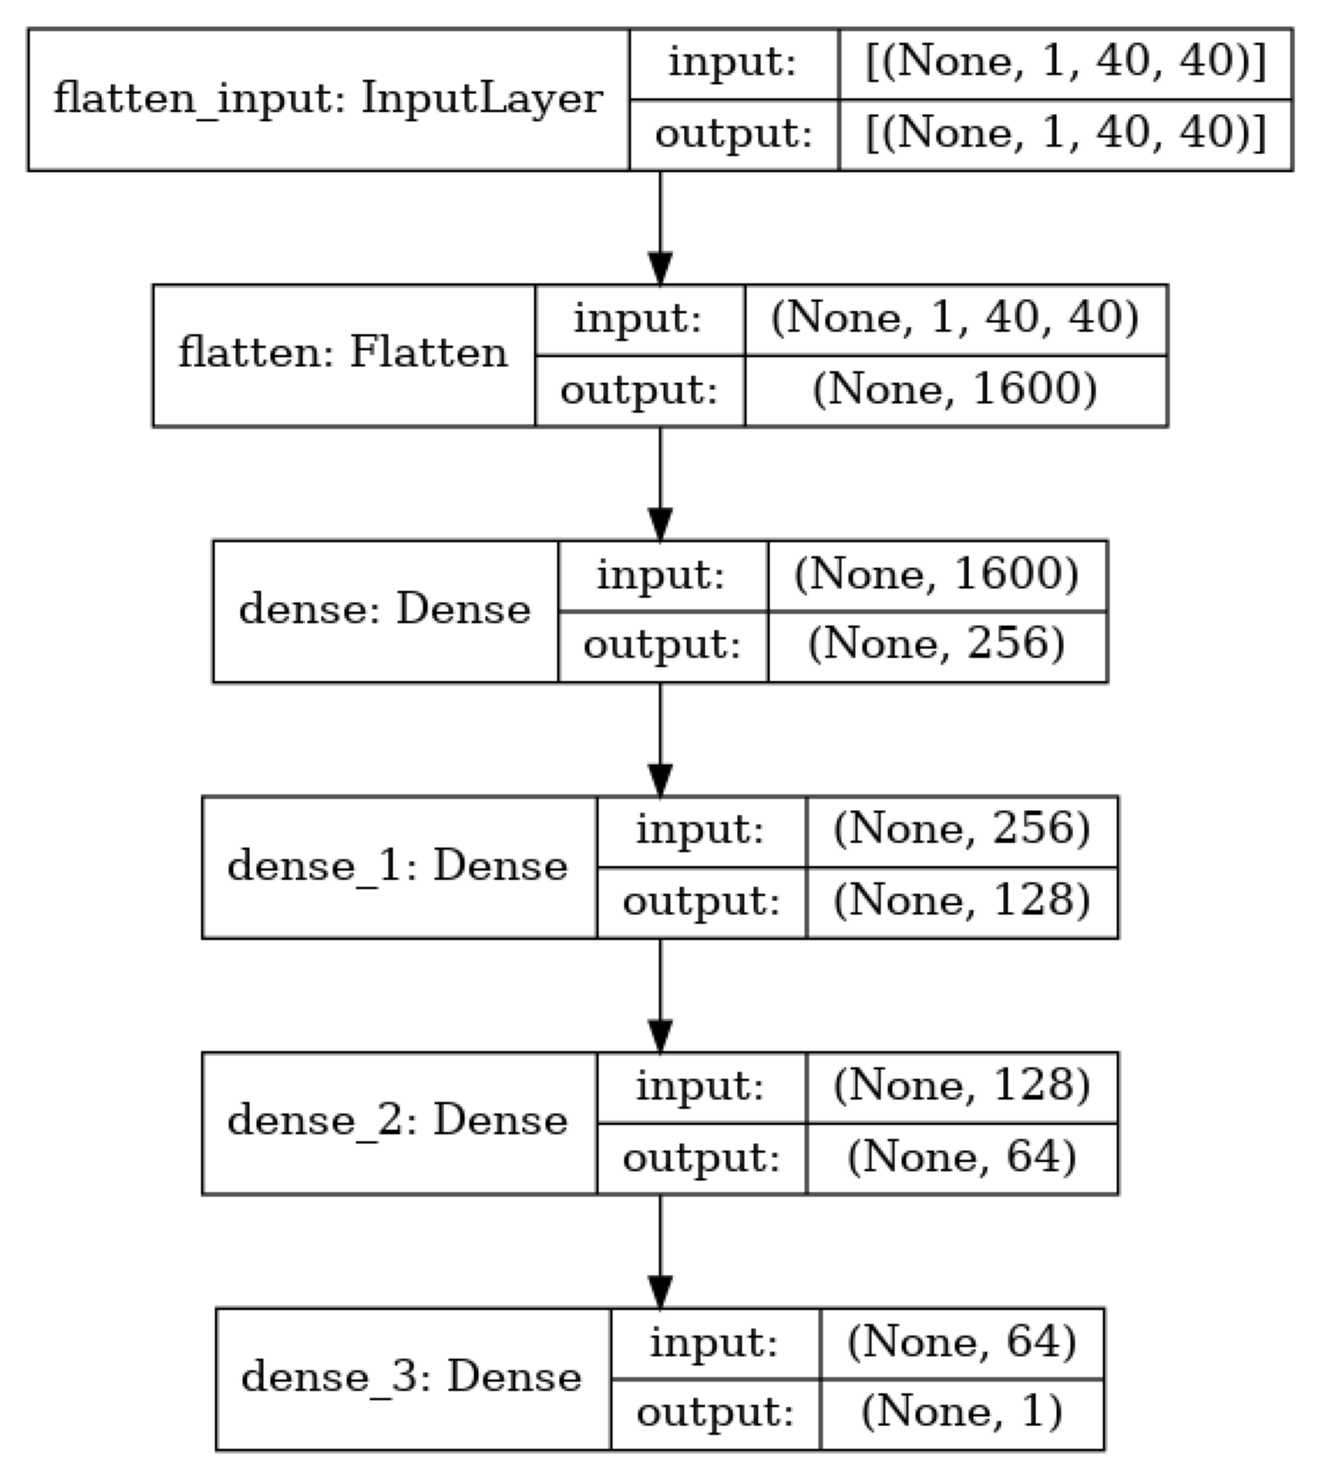

Epoch 1/50
20/20 [==============================] - 1s 28ms/step - loss: 0.7105 - accuracy: 0.5071 - val_loss: 0.7168 - val_accuracy: 0.5030
Epoch 2/50
20/20 [==============================] - 0s 18ms/step - loss: 0.7127 - accuracy: 0.4977 - val_loss: 0.7064 - val_accuracy: 0.4970
Epoch 3/50
20/20 [==============================] - 0s 18ms/step - loss: 0.7073 - accuracy: 0.5180 - val_loss: 0.7045 - val_accuracy: 0.4970
Epoch 4/50
20/20 [==============================] - 0s 18ms/step - loss: 0.7055 - accuracy: 0.5149 - val_loss: 0.7145 - val_accuracy: 0.4970
Epoch 5/50
20/20 [==============================] - 0s 21ms/step - loss: 0.7002 - accuracy: 0.5422 - val_loss: 0.7024 - val_accuracy: 0.5010
Epoch 6/50
20/20 [==============================] - 0s 17ms/step - loss: 0.6965 - accuracy: 0.5541 - val_loss: 0.6952 - val_accuracy: 0.5540
Epoch 7/50
20/20 [==============================] - 0s 18ms/step - loss: 0.6918 - accuracy: 0.5777 - val_loss: 0.6894 - val_accuracy: 0.5780
Epoch 8/50
20

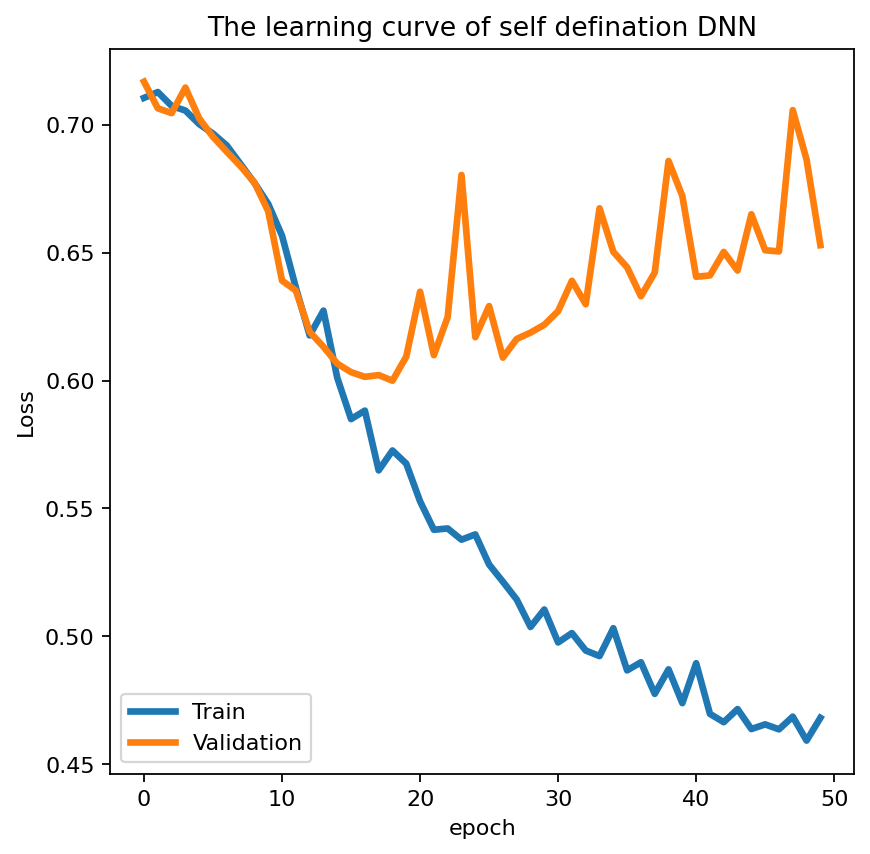

AUC of train data is: 0.8842498278336941
AUC of test data is: 0.7452652727971313


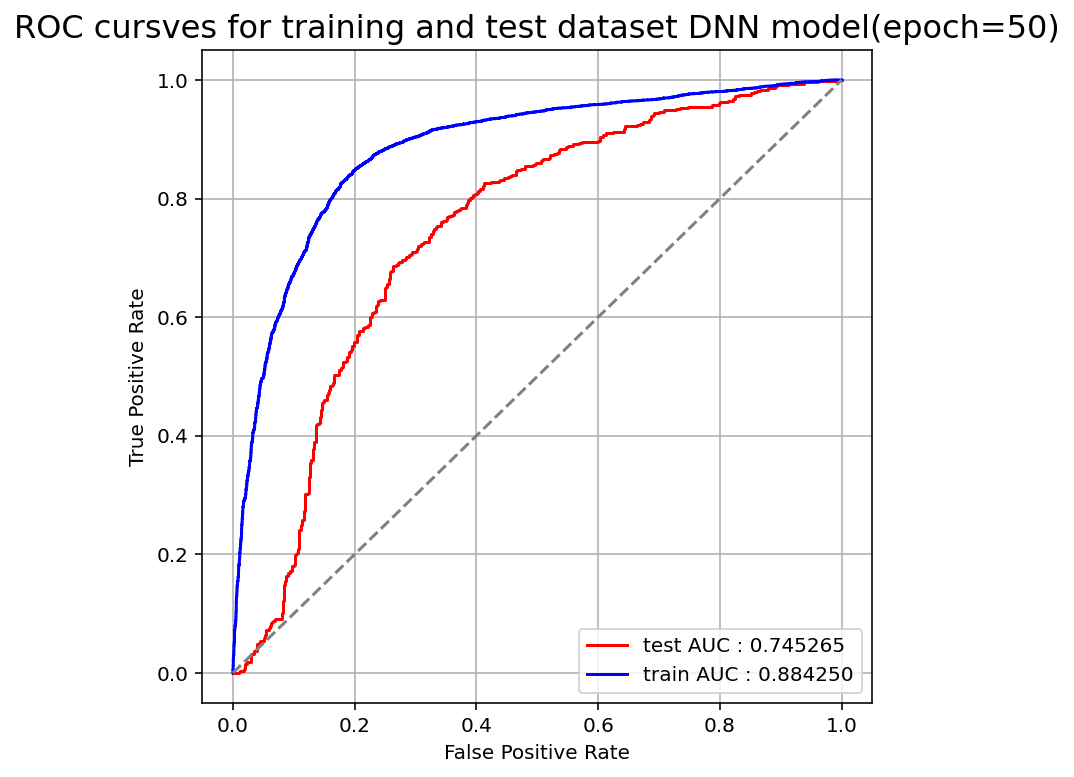

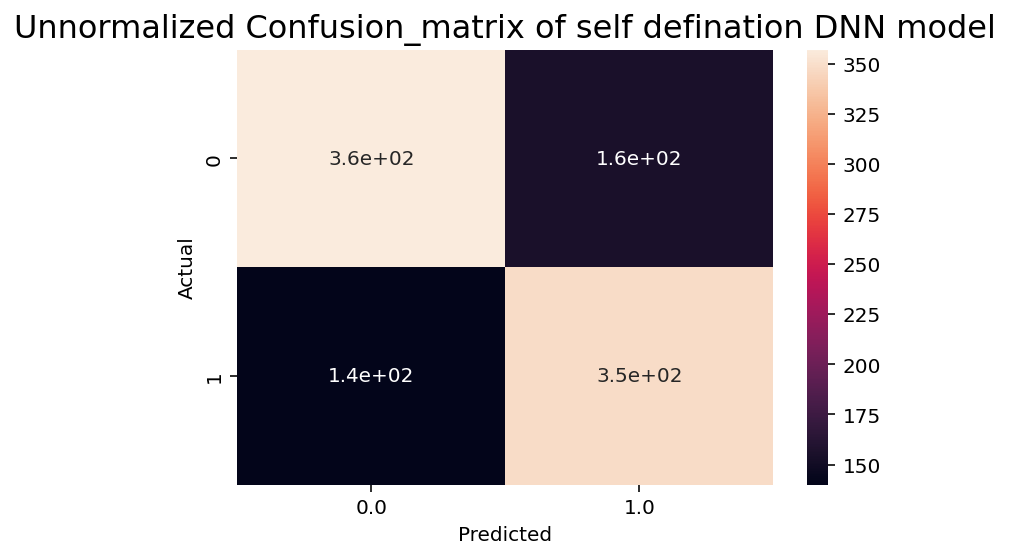

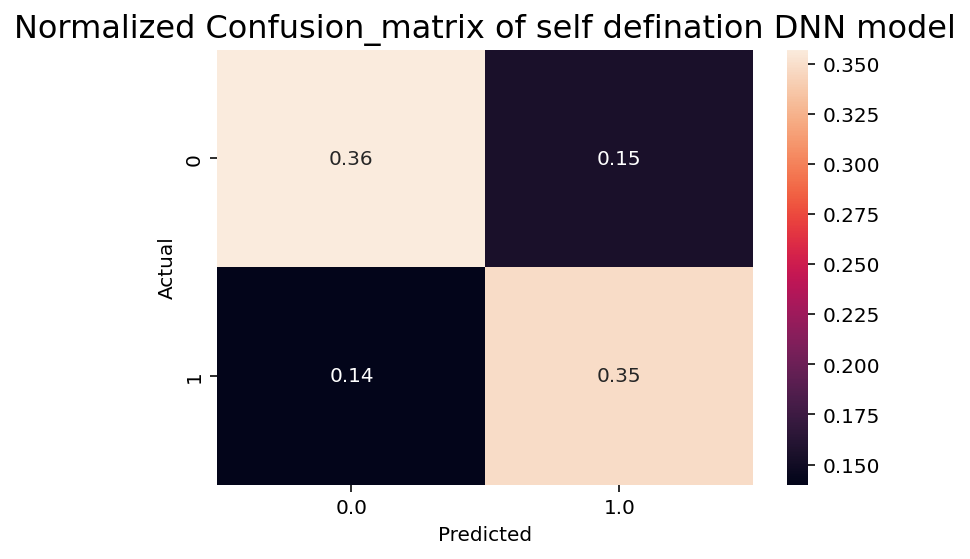

In [10]:
#############################################################################
#Code for 1.11
# 
##############################################################################
# Please code in this cell
from tensorflow.keras.regularizers import l2

"""
Define a DNN model
"""
m3 = Sequential()
m3.add(Flatten(input_shape=(1,40,40)))
m3.add(Dense(256, activation='sigmoid'))
m3.add(Dense(128, activation='sigmoid'))
m3.add(Dense(64, activation='sigmoid'))
m3.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

m3.compile(loss='binary_crossentropy',
              optimizer=Adadelta(learning_rate=2.0),
              metrics=['accuracy'])


"""
Print Architecture
"""
print(m3.summary())
fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('model_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()

"""
Model Training
"""
r3 = m3.fit(x_train_jet, target_train, epochs=50, batch_size=512,
                validation_data=(x_val_jet, target_val))

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(m3.evaluate(x_train_jet, target_train)))
print('Performance (target)')
print('Loss: %.5f, Acc: %.5f' % tuple(m3.evaluate(x_val_jet, target_val)))    

"""
Save Model
"""
m3.save("model_DNN_self.h5")


# Plot showing the evolution of loss and accuracy, comparing the training and the test samples.
fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of self defination DNN")
plt.plot(r3.history['loss'], lw=3, label='Train')
plt.plot(r3.history['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# loading model
model = load_model('model_DNN_self.h5')
target_train_np = target_train.to_numpy()
target_test_np  = target_test.to_numpy()

# roc/auc calculation
p_train = model.predict(x_train_jet)[:,0]

fpr_train, tpr_train, thr_train = roc_curve(target_train_np, p_train, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)
print('AUC of train data is:',roc_auc_train)

p_test = model.predict(x_test_jet)[:,0]
fpr_test, tpr_test, thr_test = roc_curve(target_test_np, p_test, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)
print('AUC of test data is:',roc_auc_test)

# plot roc curve
plt.figure(figsize=(6,6))
plt.title('ROC cursves for training and test dataset DNN model(epoch=50)', fontsize=16)
plt.plot(fpr_test,tpr_test, color='r',label = 'test AUC : %f' %roc_auc_test)
plt.plot(fpr_train,tpr_train, color='b',label = 'train AUC : %f' %roc_auc_train)
# Add a diagonal line representing the ROC from random choice
plt.plot([0, 1], [0, 1],linestyle='--', c='grey')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()


# deal with confusion matrix
p_train[p_train>0.5]=1
p_train[p_train<0.5]=0

p_test[p_test>0.5]=1
p_test[p_test<0.5]=0

# save a dataframe of test and predict
data = {'target_test': target_test_np, 'p_test': p_test }
df = pd.DataFrame(data, columns=['target_test','p_test'])

# create a confusion matrix
confusion_matrix0 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix1 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'], normalize=True)

sn.heatmap(confusion_matrix0, annot=True)
plt.title("Unnormalized Confusion_matrix of self defination DNN model", fontsize=16)
plt.show()

sn.heatmap(confusion_matrix1, annot=True)
plt.title("Normalized Confusion_matrix of self defination DNN model", fontsize=16)
plt.show()

##############################################################################

# Bonus - Load Large Data for Training
---
#### In cells above, we only load 10,000 events for training. However, the data statistics is too low. If we want to let our model become more healthy, we should use more data for training. But the memory is limited, we can not load huge data into RAM. To conquer this difficulty, generator method is one of solutions for this issue. 

* Please read reference to understand how to define generator.
* Please load data and labels in the `Train_1_channel` folder, in the `Validation_1_channel` folder and in `Test_1_channel` folder.
* Please load top 100,000 data in `Train_1_channel` folder using generator method. 
* Please load top 10,000 data in `Validation_1_channel` using generator method. 
* Please load top 10,000 data in `Test_1_channel` using generator method. 
* Pleas use the same DNN model as cell **1.5** to train the DNN model.

Learning Curve
* Please make a learning curve of the DNN from Bonus part.
* The x-axis will be **epoch** and y-axis will be **loss**.
* You need to put learning curve of training and validation in this figure together.

Performance
* Please use test data set to study performance.
    * Please calculate AUC.
    * Please make a ROC figure.
    * Please make a figure for confusion matrix.


Hint: [Generator Method Example](https://www.kaggle.com/born2bdev/keras-cnn-with-custom-data-generator/notebook)

Hint. [A detailed example of how to use data generators with Keras](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               409856    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 451,073
Trainable params: 451,073
Non-trainable params: 0
_________________________________________________________________
None


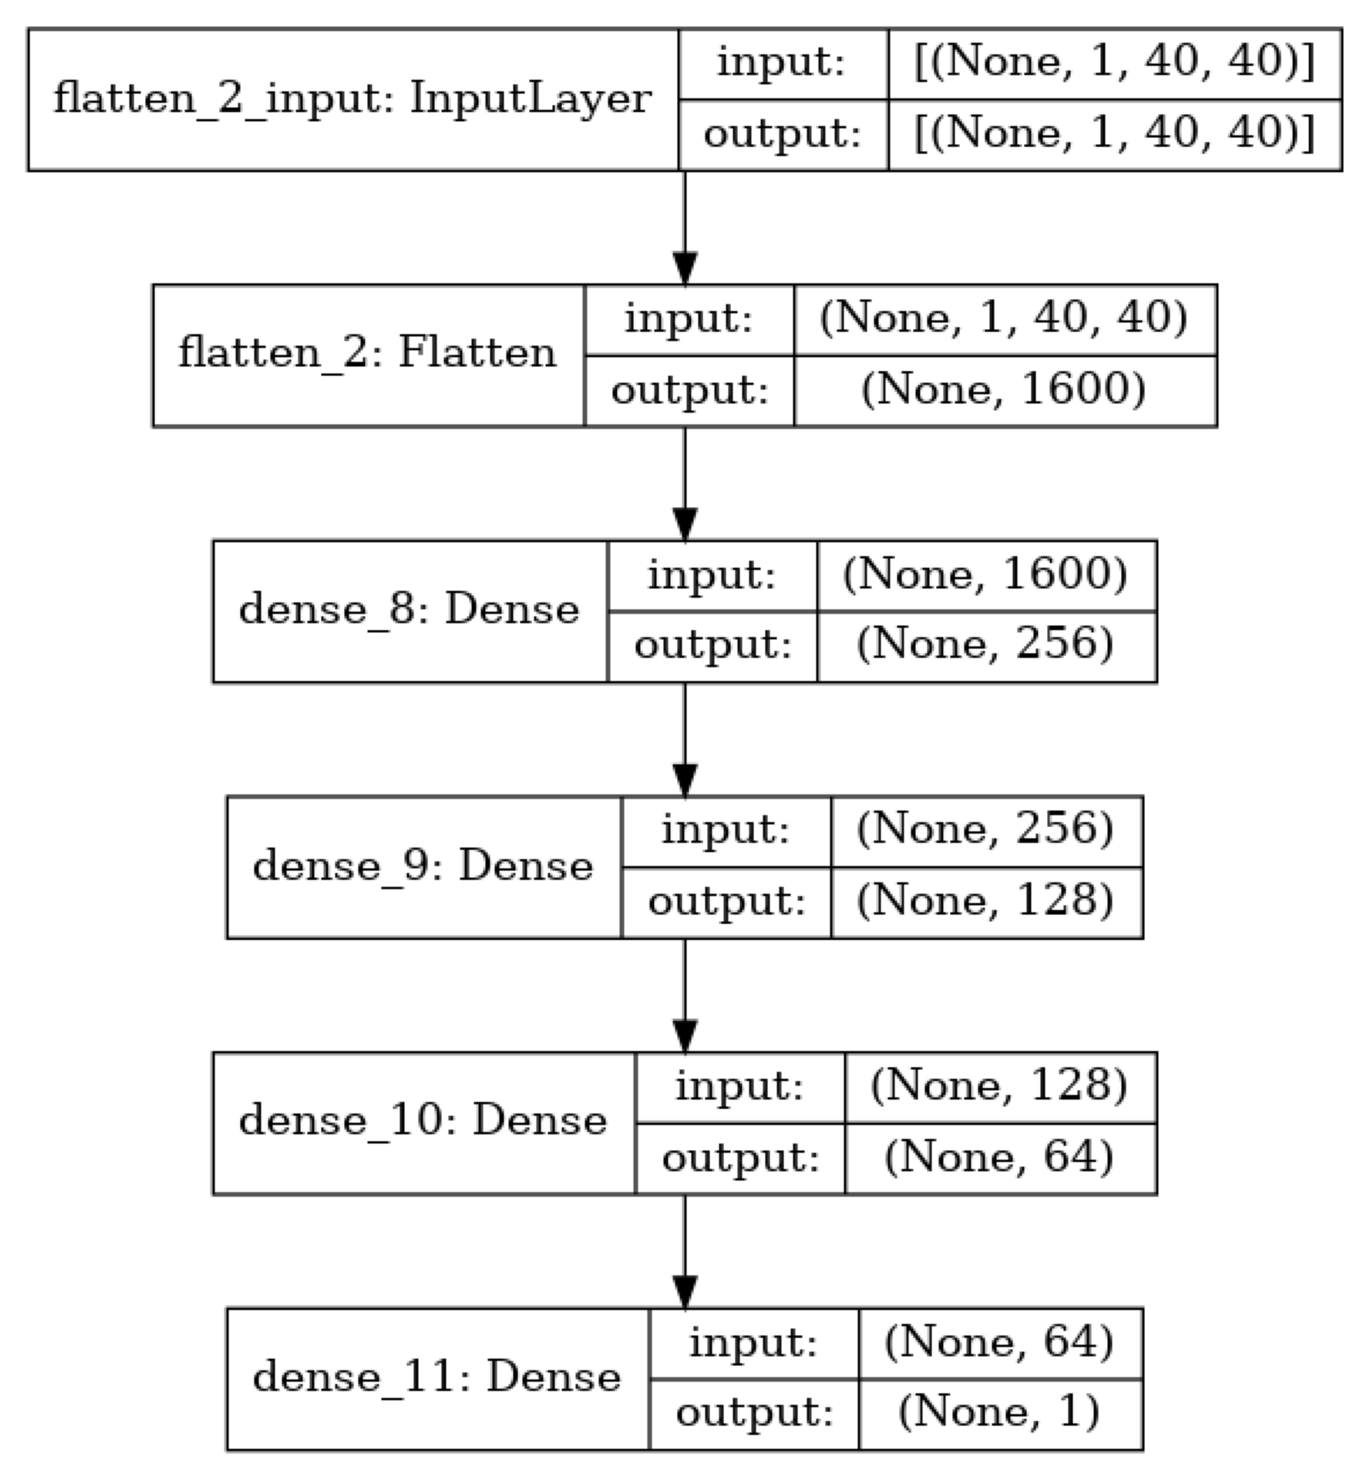

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
195/195 [==============================] - 742s 4s/step - loss: 0.5829 - accuracy: 0.6988 - val_loss: 0.8989 - val_accuracy: 0.4972
Epoch 2/50
195/195 [==============================] - 176s 907ms/step - loss: 0.5140 - accuracy: 0.7536 - val_loss: 0.9588 - val_accuracy: 0.4977
Epoch 3/50
195/195 [==============================] - 175s 900ms/step - loss: 0.4861 - accuracy: 0.7744 - val_loss: 0.9627 - val_accuracy: 0.4992
Epoch 4/50
195/195 [==============================] - 177s 913ms/step - loss: 0.4604 - accuracy: 0.7923 - val_loss: 1.0186 - val_accuracy: 0.5044
Epoch 5/50
195/195 [==============================] - 180s 927ms/step - loss: 0.4358 - accuracy: 0.8071 - val_loss: 1.0440 - val_accuracy: 0.5005
Epoch 6/50
195/195 [==============================] - 181s 931ms/step - loss: 0.4080 - accuracy: 0.8247 - val_loss: 1.0838 - val_accuracy: 0.5065
Epoch 7/50
195/195 [==============================] - 181s 935ms/step - loss: 0.3793 - accuracy: 0.8396 - val_loss: 1.2385 - va

In [11]:
%%time 
#############################################################################
# Code for Bonus
# 
#############################################################################
# Please code in this cell


"""
Define generator()
"""

batch_size = 512
#nb_train_samples = train_dict.shape[0]
#nb_test_samples = test_dict.shape[0]
#nb_valid_samples = val_dict.shape[0]


nb_train_samples = 100000
nb_test_samples = 10000
nb_valid_samples = 10000


def train_generator():
    while True:
        for start in range(0, nb_train_samples, batch_size):
            x_batch_train = []
            y_batch_train = []
            
            end = min(start + batch_size, nb_train_samples)
            for i in range(start, end):
                x_jet_path = path + "/Train_1_channel/" + train_dict["Jet_Images"][i]
                x_jet_tmp = np.load(x_jet_path)["jet_images"]
                x_batch_train.append(x_jet_tmp)
                y_batch_train = train_dict["Y"][start:end]
            yield (np.array(x_batch_train), np.array(y_batch_train))
    
    
    
def val_generator():
    while True:
        for start in range(0, nb_valid_samples, batch_size):
            x_batch_val = []
            y_batch_val = []
            
            end = min(start + batch_size, nb_train_samples)
            for i in range(start, end):
                x_jet_path = path + "/Validation_1_channel/" + val_dict["Jet_Images"][i]
                x_jet_tmp = np.load(x_jet_path)["jet_images"]
                x_batch_val.append(x_jet_tmp)
                y_batch_val = train_dict["Y"][start:end]
            yield (np.array(x_batch_val), np.array(y_batch_val))
   


            
def test_generator():
    while True:
        for start in range(0, nb_test_samples, batch_size):
            x_batch_test = []
            y_batch_test = []
            
            end = min(start + batch_size, nb_train_samples)
            for i in range(start, end):
                x_jet_path = path + "/Test_channel/" + test_dict["Jet_Images"][i]
                x_jet_tmp = np.load(x_jet_path)["jet_images"]
                x_batch_test.append(x_jet_tmp)
                y_batch_test = train_dict["Y"][start:end]
            yield (np.array(x_batch_test), np.array(y_batch_test))
    
    

"""
Define a DNN model
"""
m4 = Sequential()
m4.add(Flatten(input_shape=(1,40,40)))
m4.add(Dense(256, activation='relu'))
m4.add(Dense(128, activation='relu'))
m4.add(Dense(64, activation='relu'))
m4.add(Dense(1, activation='sigmoid'))

m4.compile(loss='binary_crossentropy',
              optimizer=Adadelta(learning_rate=1.0),
              metrics=['accuracy'])


"""
Print Architecture
"""
print(m4.summary())
fig = plt.figure(figsize=(16,12), dpi=80)
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
image = img.imread('model_plot.png')
plt.imshow(image)
plt.axis("off")
plt.show()

"""
Model Training
"""


r4 = m4.fit_generator(
    train_generator(),
    epochs = 50,
    steps_per_epoch = nb_train_samples // batch_size,
    validation_data = val_generator(),
    validation_steps = nb_valid_samples // batch_size,
)

print('Performance (training)')
print('Loss: %.5f, Acc: %.5f' % tuple(m4.evaluate(x_train_jet, target_train)))
print('Performance (target)')
print('Loss: %.5f, Acc: %.5f' % tuple(m4.evaluate(x_val_jet, target_val)))    

"""
Save Model
"""
m4.save("model_DNN_self_gen.h5")




             
#############################################################################

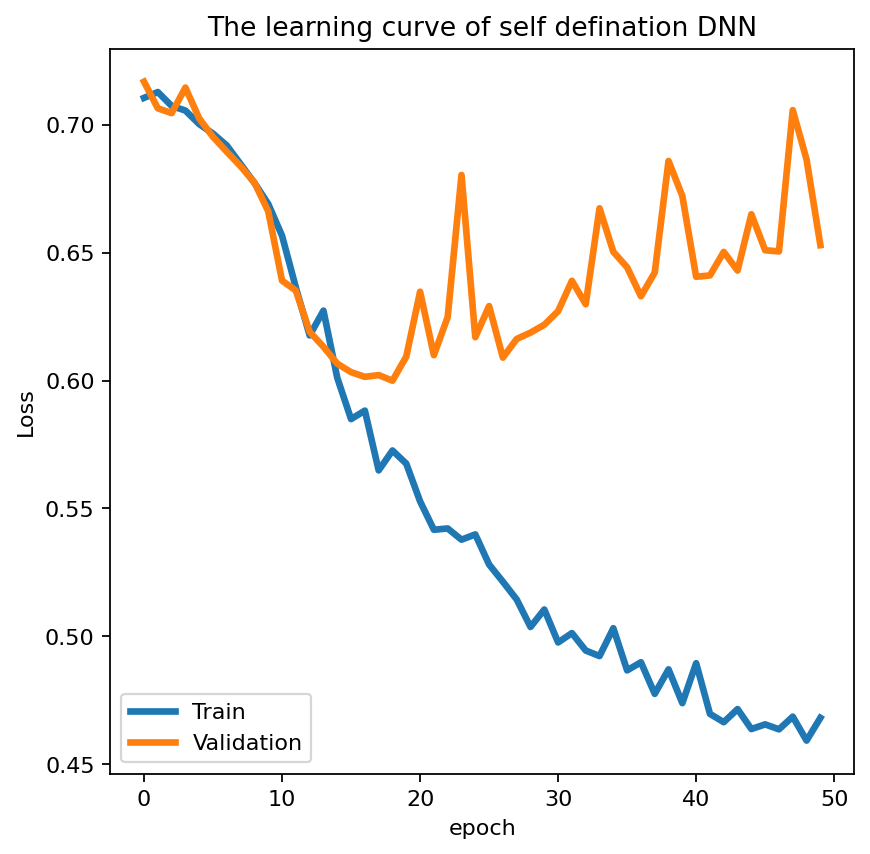

AUC of train data is: 0.9991140617180397
AUC of test data is: 0.7252037173411886


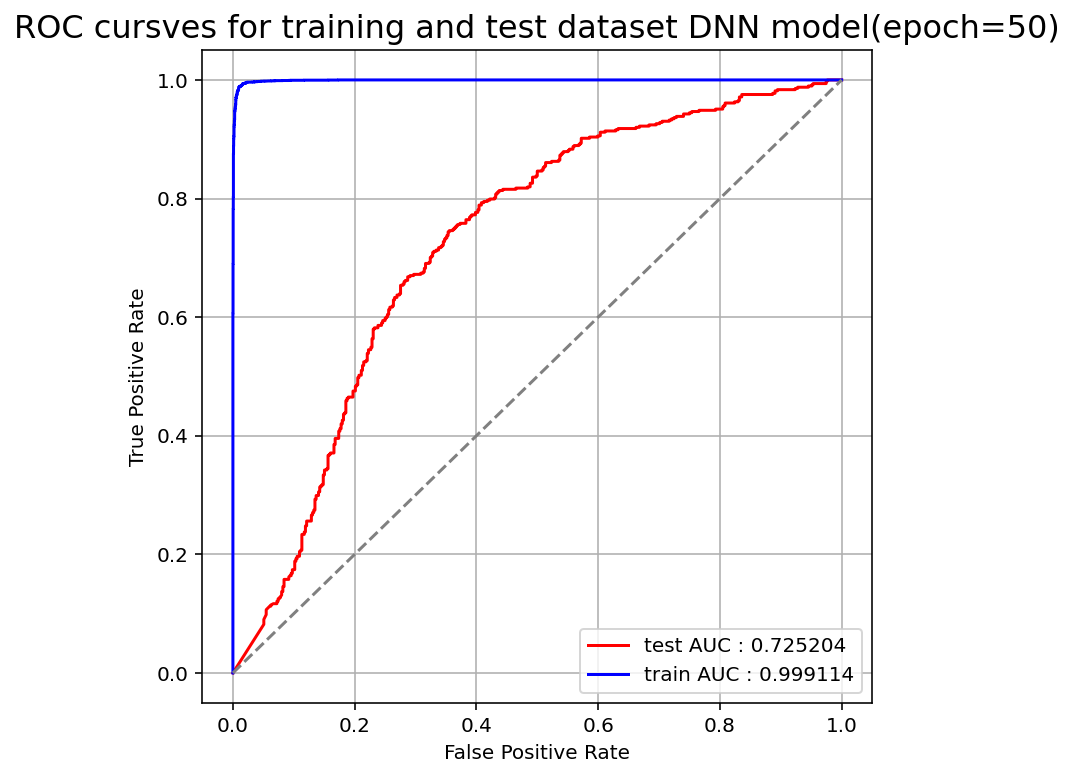

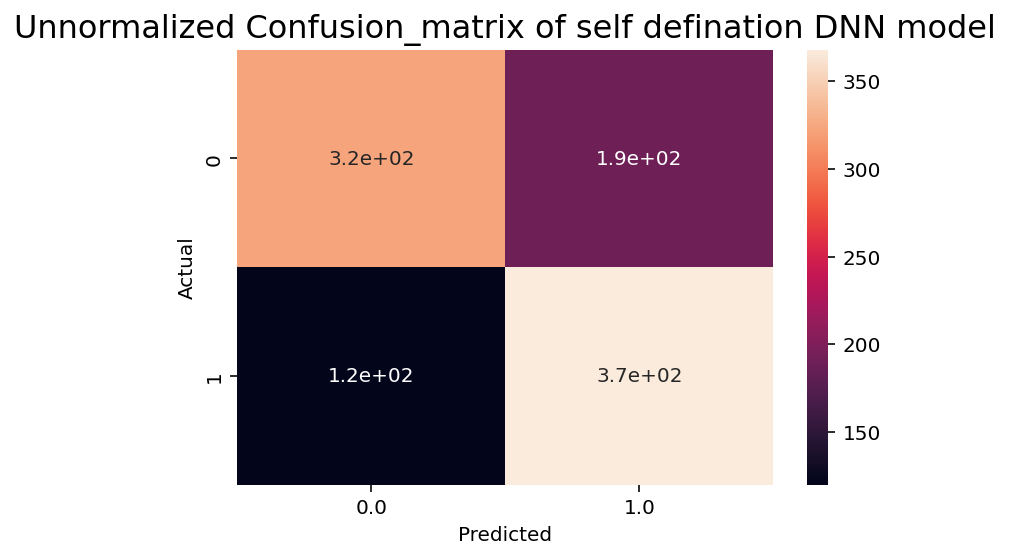

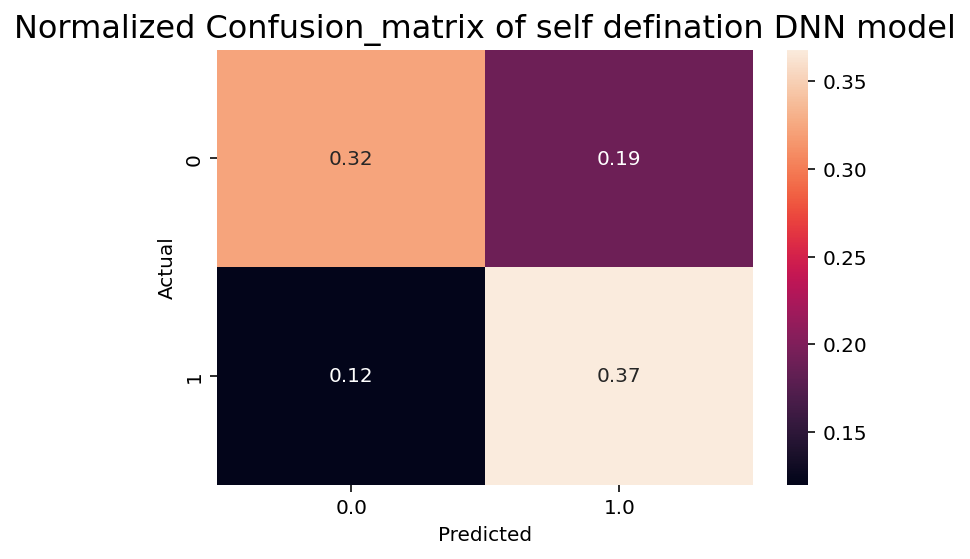

'\nROC Curve and Confusion Matrix\n'

In [12]:
#############################################################################
# Code for Bonus
# Learning Curve
# ROC Curve and Confusion Matrix
#############################################################################
# Please code in this cell




# Plot showing the evolution of loss and accuracy, comparing the training and the test samples.
fig = plt.figure(figsize=(6,6), dpi=80)
plt.title("The learning curve of self defination DNN")
plt.plot(r3.history['loss'], lw=3, label='Train')
plt.plot(r3.history['val_loss'], lw=3, label='Validation')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# loading model
model = load_model('model_DNN_self_gen.h5')
target_train_np = target_train.to_numpy()
target_test_np  = target_test.to_numpy()

# roc/auc calculation
p_train = model.predict(x_train_jet)[:,0]

fpr_train, tpr_train, thr_train = roc_curve(target_train_np, p_train, pos_label=1)
roc_auc_train = auc(fpr_train, tpr_train)
print('AUC of train data is:',roc_auc_train)

p_test = model.predict(x_test_jet)[:,0]
fpr_test, tpr_test, thr_test = roc_curve(target_test_np, p_test, pos_label=1)
roc_auc_test = auc(fpr_test, tpr_test)
print('AUC of test data is:',roc_auc_test)

# plot roc curve
plt.figure(figsize=(6,6))
plt.title('ROC cursves for training and test dataset DNN model(epoch=50)', fontsize=16)
plt.plot(fpr_test,tpr_test, color='r',label = 'test AUC : %f' %roc_auc_test)
plt.plot(fpr_train,tpr_train, color='b',label = 'train AUC : %f' %roc_auc_train)
# Add a diagonal line representing the ROC from random choice
plt.plot([0, 1], [0, 1],linestyle='--', c='grey')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid()
plt.legend()
plt.show()


# deal with confusion matrix
p_train[p_train>0.5]=1
p_train[p_train<0.5]=0

p_test[p_test>0.5]=1
p_test[p_test<0.5]=0

# save a dataframe of test and predict
data = {'target_test': target_test_np, 'p_test': p_test }
df = pd.DataFrame(data, columns=['target_test','p_test'])

# create a confusion matrix
confusion_matrix0 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix1 = pd.crosstab(df['target_test'], df['p_test'], rownames=['Actual'], colnames=['Predicted'], normalize=True)

sn.heatmap(confusion_matrix0, annot=True)
plt.title("Unnormalized Confusion_matrix of self defination DNN model", fontsize=16)
plt.show()

sn.heatmap(confusion_matrix1, annot=True)
plt.title("Normalized Confusion_matrix of self defination DNN model", fontsize=16)
plt.show()

"""
Learning Curve
"""





"""
ROC Curve and Confusion Matrix
"""





#############################################################################
